In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [3]:
#Demographic Variables and Sample Weights (DEMO_L)

url_demographics = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DEMO_L.XPT'

response = requests.get(url_demographics)

if response.status_code == 200:
    with open('DEMO_L.XPT', 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully! \u2705')

else:
    print('Oops! Something went wrong. Status code: {response.content_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [4]:
demographics_data = pd.read_sas('DEMO_L.XPT')

demographics_data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [5]:
column_rename_dict = {
    'SEQN': 'ID',
    'SDDSRVYR': 'Data release cycle',
    'RIDSTATR': 'Interview/Examination status',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age in years at screening',
    'RIDAGEMN': 'Age in months at screening - 0 to 24 mos',
    'RIDRETH1': 'Race/Hispanic origin',
    'RIDRETH3': 'Race/Hispanic origin w/ NH Asian',
    'RIDEXMON': 'Six-month time period',
    'RIDEXAGM': 'Age in months at exam - 0 to 19 years',
    'DMQMILIZ': 'Served active duty in US Armed Forces',
    'DMDBORN4': 'Country of birth',
    'DMDYRUSR': 'Length of time in US',
    'DMDEDUC2': 'Education level - Adults 20+',
    'DMDMARTZ': 'Marital status',
    'RIDEXPRG': 'Pregnancy status at exam',
    'DMDHHSIZ': 'Total number of people in the Household',
    'DMDHRGND': 'HH ref person’s gender',
    'DMDHRAGZ': 'HH ref person’s age in years',
    'DMDHREDZ': 'HH ref person’s education level',
    'DMDHRMAZ': 'HH ref person’s marital status',
    'DMDHSEDZ': 'HH ref person’s spouse’s education level',
    'WTINT2YR': 'Full sample 2-year interview weight',
    'WTMEC2YR': 'Full sample 2-year MEC exam weight',
    'SDMVSTRA': 'Masked variance pseudo-stratum',
    'SDMVPSU': 'Masked variance pseudo-PSU',
    'INDFMPIR': 'Ratio of family income to poverty'
}

demographics_data = demographics_data.rename(columns=column_rename_dict)

demographics_data.head()

,ID,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six-month time period,Age in months at exam - 0 to 19 years,...,HH ref person’s gender,HH ref person’s age in years,HH ref person’s education level,HH ref person’s marital status,HH ref person’s spouse’s education level,Full sample 2-year interview weight,Full sample 2-year MEC exam weight,Masked variance pseudo-stratum,Masked variance pseudo-PSU,Ratio of family income to poverty
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [6]:
demographics_data.columns

Index(['ID', 'Data release cycle', 'Interview/Examination status', 'Gender',
       'Age in years at screening', 'Age in months at screening - 0 to 24 mos',
       'Race/Hispanic origin', 'Race/Hispanic origin w/ NH Asian',
       'Six-month time period', 'Age in months at exam - 0 to 19 years',
       'Served active duty in US Armed Forces', 'Country of birth',
       'Length of time in US', 'Education level - Adults 20+',
       'Marital status', 'Pregnancy status at exam',
       'Total number of people in the Household', 'HH ref person’s gender',
       'HH ref person’s age in years', 'HH ref person’s education level',
       'HH ref person’s marital status',
       'HH ref person’s spouse’s education level',
       'Full sample 2-year interview weight',
       'Full sample 2-year MEC exam weight', 'Masked variance pseudo-stratum',
       'Masked variance pseudo-PSU', 'Ratio of family income to poverty'],
      dtype='object')

In [7]:
demographics_data.shape

(11933, 27)

In [8]:
demographics_data.nunique()

ID                                          11933
Data release cycle                              1
Interview/Examination status                    2
Gender                                          2
Age in years at screening                      81
Age in months at screening - 0 to 24 mos       25
Race/Hispanic origin                            5
Race/Hispanic origin w/ NH Asian                6
Six-month time period                           2
Age in months at exam - 0 to 19 years         240
Served active duty in US Armed Forces           3
Country of birth                                2
Length of time in US                            8
Education level - Adults 20+                    6
Marital status                                  5
Pregnancy status at exam                        3
Total number of people in the Household         7
HH ref person’s gender                          2
HH ref person’s age in years                    4
HH ref person’s education level                 3


In [9]:
demographics_data.duplicated().sum()

np.int64(0)

In [10]:
demographics_data.isnull().sum()

ID                                              0
Data release cycle                              0
Interview/Examination status                    0
Gender                                          0
Age in years at screening                       0
Age in months at screening - 0 to 24 mos    11556
Race/Hispanic origin                            0
Race/Hispanic origin w/ NH Asian                0
Six-month time period                        3073
Age in months at exam - 0 to 19 years        9146
Served active duty in US Armed Forces        3632
Country of birth                               19
Length of time in US                        10058
Education level - Adults 20+                 4139
Marital status                               4141
Pregnancy status at exam                    10430
Total number of people in the Household         0
HH ref person’s gender                       7818
HH ref person’s age in years                 7809
HH ref person’s education level              8187


In [11]:
demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        11933 non-null  float64
 1   Data release cycle                        11933 non-null  float64
 2   Interview/Examination status              11933 non-null  float64
 3   Gender                                    11933 non-null  float64
 4   Age in years at screening                 11933 non-null  float64
 5   Age in months at screening - 0 to 24 mos  377 non-null    float64
 6   Race/Hispanic origin                      11933 non-null  float64
 7   Race/Hispanic origin w/ NH Asian          11933 non-null  float64
 8   Six-month time period                     8860 non-null   float64
 9   Age in months at exam - 0 to 19 years     2787 non-null   float64
 10  Served active duty in US Armed For

In [12]:
demographics_data.describe()

,ID,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six-month time period,Age in months at exam - 0 to 19 years,...,HH ref person’s gender,HH ref person’s age in years,HH ref person’s education level,HH ref person’s marital status,HH ref person’s spouse’s education level,Full sample 2-year interview weight,Full sample 2-year MEC exam weight,Masked variance pseudo-stratum,Masked variance pseudo-PSU,Ratio of family income to poverty
count,11933.000000,11933.0,11933.000000,11933.000000,1.193300e+04,3.770000e+02,11933.000000,11933.000000,8860.000000,2.787000e+03,...,4115.000000,4124.000000,3746.000000,4020.000000,2127.000000,11933.000000,1.193300e+04,11933.000000,11933.000000,9.892000e+03
mean,136344.000000,12.0,1.742479,1.532808,3.831786e+01,1.162865e+01,3.104584,3.320540,1.520203,1.219085e+02,...,1.564277,2.539525,2.171383,1.381095,2.275035,27404.135674,2.740414e+04,179.918294,1.491746,2.708174e+00
std,3444.904716,0.0,0.437287,0.498943,2.560199e+01,6.805429e+00,1.076346,1.518379,0.499620,6.715865e+01,...,0.495912,0.641094,0.660132,0.681421,0.694050,19449.155209,2.796296e+04,4.309624,0.499953,1.670119e+00
min,130378.000000,12.0,1.000000,1.000000,5.397605e-79,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,...,1.000000,1.000000,1.000000,1.000000,1.000000,4584.463196,5.397605e-79,173.000000,1.000000,5.397605e-79
25%,133361.000000,12.0,1.000000,1.000000,1.300000e+01,6.000000e+00,3.000000,3.000000,1.000000,6.600000e+01,...,1.000000,2.000000,2.000000,1.000000,2.000000,14331.753594,5.397605e-79,176.000000,1.000000,1.180000e+00
50%,136344.000000,12.0,2.000000,2.000000,3.700000e+01,1.100000e+01,3.000000,3.000000,2.000000,1.220000e+02,...,2.000000,2.000000,2.000000,1.000000,2.000000,21670.185970,2.171785e+04,180.000000,1.000000,2.500000e+00
75%,139327.000000,12.0,2.000000,2.000000,6.200000e+01,1.700000e+01,4.000000,4.000000,2.000000,1.795000e+02,...,2.000000,3.000000,3.000000,2.000000,3.000000,33831.331556,3.834115e+04,184.000000,2.000000,4.500000e+00
max,142310.000000,12.0,2.000000,2.000000,8.000000e+01,2.400000e+01,5.000000,7.000000,2.000000,2.390000e+02,...,2.000000,4.000000,3.000000,3.000000,3.000000,170968.343177,2.271083e+05,187.000000,2.000000,5.000000e+00


In [13]:
demographics_data.var()

ID                                          1.186737e+07
Data release cycle                          0.000000e+00
Interview/Examination status                1.912200e-01
Gender                                      2.489445e-01
Age in years at screening                   6.554619e+02
Age in months at screening - 0 to 24 mos    4.631386e+01
Race/Hispanic origin                        1.158522e+00
Race/Hispanic origin w/ NH Asian            2.305476e+00
Six-month time period                       2.496200e-01
Age in months at exam - 0 to 19 years       4.510285e+03
Served active duty in US Armed Forces       7.973634e-02
Country of birth                            1.326212e-01
Length of time in US                        2.505623e+02
Education level - Adults 20+                1.331139e+00
Marital status                              9.616696e+00
Pregnancy status at exam                    2.354714e-01
Total number of people in the Household     2.888341e+00
HH ref person’s gender         

In [14]:
demographics_data.corr()

,ID,Data release cycle,Interview/Examination status,Gender,Age in years at screening,Age in months at screening - 0 to 24 mos,Race/Hispanic origin,Race/Hispanic origin w/ NH Asian,Six-month time period,Age in months at exam - 0 to 19 years,...,HH ref person’s gender,HH ref person’s age in years,HH ref person’s education level,HH ref person’s marital status,HH ref person’s spouse’s education level,Full sample 2-year interview weight,Full sample 2-year MEC exam weight,Masked variance pseudo-stratum,Masked variance pseudo-PSU,Ratio of family income to poverty
ID,1.000000,NaN,0.000901,0.029206,0.010956,0.082122,-0.011571,-0.013413,0.011338,0.005944,...,-0.006682,0.007455,0.015893,-0.014719,0.009883,0.009036,0.000214,0.006987,0.021943,0.003477
Data release cycle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interview/Examination status,0.000901,NaN,1.000000,0.005500,0.105296,-0.058379,-0.009725,-0.018300,NaN,NaN,...,0.009091,0.044113,0.036095,-0.018280,0.006186,0.010331,0.577186,-0.042429,-0.014132,0.032360
Gender,0.029206,NaN,0.005500,1.000000,0.043696,0.029786,-0.001240,-0.007743,0.004003,0.012235,...,0.014105,-0.021951,-0.009732,-0.006256,-0.003304,-0.068612,-0.047722,0.018143,0.007889,-0.045518
Age in years at screening,0.010956,NaN,0.105296,0.043696,1.000000,0.862666,0.032357,-0.007554,0.035735,0.998621,...,0.033726,0.255296,-0.047032,0.079034,-0.066466,0.036957,0.027675,-0.039081,-0.008808,0.157336
Age in months at screening - 0 to 24 mos,0.082122,NaN,-0.058379,0.029786,0.862666,1.000000,0.005543,-0.007307,0.016735,0.992935,...,-0.015380,0.045987,-0.038943,-0.025912,0.071868,0.026981,-0.001652,-0.019186,-0.033623,0.003080
Race/Hispanic origin,-0.011571,NaN,-0.009725,-0.001240,0.032357,0.005543,1.000000,0.959359,0.091678,-0.038719,...,-0.019576,0.013960,0.187545,0.051804,0.235329,-0.002230,0.001366,0.035701,0.092402,0.036055
Race/Hispanic origin w/ NH Asian,-0.013413,NaN,-0.018300,-0.007743,-0.007554,-0.007307,0.959359,1.000000,0.075332,-0.035546,...,-0.031529,0.015584,0.146670,0.030234,0.180997,-0.011441,-0.008976,-0.003029,0.084466,0.005096
Six-month time period,0.011338,NaN,NaN,0.004003,0.035735,0.016735,0.091678,0.075332,1.000000,0.011826,...,-0.031344,-0.017271,0.074069,-0.072955,0.125656,0.166089,0.156672,-0.158734,0.123716,0.108146
Age in months at exam - 0 to 19 years,0.005944,NaN,NaN,0.012235,0.998621,0.992935,-0.038719,-0.035546,0.011826,1.000000,...,0.019831,0.269891,-0.042292,0.081807,-0.064256,0.161860,0.059913,-0.027304,-0.013109,0.016464


In [124]:
demographics_data.nunique()

ID                                          11933
Data release cycle                              1
Interview/Examination status                    2
Gender                                          2
Age in years at screening                      81
Age in months at screening - 0 to 24 mos       25
Race/Hispanic origin                            5
Race/Hispanic origin w/ NH Asian                6
Six-month time period                           2
Age in months at exam - 0 to 19 years         240
Served active duty in US Armed Forces           3
Country of birth                                2
Length of time in US                            8
Education level - Adults 20+                    6
Marital status                                  5
Pregnancy status at exam                        3
Total number of people in the Household         7
HH ref person’s gender                          2
HH ref person’s age in years                    4
HH ref person’s education level                 3


In [16]:
#Blood Pressure - Oscillometric Measurements (BPXO_L)

url_blood_pressure = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPXO_L.xpt'

response = requests.get(url_blood_pressure)

if response.status_code == 200:
    with open('BPXO_L.xpt', 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully! \u2705')
else:
    print('Oops! Something went wrong. Status code: {response.content_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [17]:
blood_pressure_data = pd.read_sas('BPXO_L.xpt')

blood_pressure_data.head()

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0


In [18]:
column_rename_dict = {
    'SEQN': 'ID',
    'BPAOARM': 'Arm selected - oscillometric',
    'BPAOCSZ': 'Coded cuff size - oscillometric',
    'BPXOSY1': 'Systolic - 1st oscillometric reading',
    'BPXODI1': 'Diastolic - 1st oscillometric reading',
    'BPXOSY2': 'Systolic - 2nd oscillometric reading',
    'BPXODI2': 'Diastolic - 2nd oscillometric reading',
    'BPXOSY3': 'Systolic - 3rd oscillometric reading',
    'BPXODI3': 'Diastolic - 3rd oscillometric reading',
    'BPXOPLS1': 'Pulse - 1st oscillometric reading',
    'BPXOPLS2': 'Pulse - 2nd oscillometric reading',
    'BPXOPLS3': 'Pulse - 3rd oscillometric reading'
}

blood_pressure_data.rename(columns=column_rename_dict, inplace=True)

blood_pressure_data.head()

,ID,Arm selected - oscillometric,Coded cuff size - oscillometric,Systolic - 1st oscillometric reading,Diastolic - 1st oscillometric reading,Systolic - 2nd oscillometric reading,Diastolic - 2nd oscillometric reading,Systolic - 3rd oscillometric reading,Diastolic - 3rd oscillometric reading,Pulse - 1st oscillometric reading,Pulse - 2nd oscillometric reading,Pulse - 3rd oscillometric reading
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0


In [19]:
blood_pressure_data = blood_pressure_data.drop(columns=['Arm selected - oscillometric', 
                                                        'Coded cuff size - oscillometric'])

In [20]:
print(blood_pressure_data.columns)

Index(['ID', 'Systolic - 1st oscillometric reading',
       'Diastolic - 1st oscillometric reading',
       'Systolic - 2nd oscillometric reading',
       'Diastolic - 2nd oscillometric reading',
       'Systolic - 3rd oscillometric reading',
       'Diastolic - 3rd oscillometric reading',
       'Pulse - 1st oscillometric reading',
       'Pulse - 2nd oscillometric reading',
       'Pulse - 3rd oscillometric reading'],
      dtype='object')


In [21]:
print("\033[33mDataFrame before dropping NaNs:\033[0m")
blood_pressure_data.shape

DataFrame before dropping NaNs:


(7801, 10)

In [22]:
columns_to_check = [
    'Diastolic - 1st oscillometric reading',
    'Systolic - 2nd oscillometric reading',
    'Diastolic - 2nd oscillometric reading',
    'Systolic - 3rd oscillometric reading',
    'Diastolic - 3rd oscillometric reading',
    'Pulse - 1st oscillometric reading',
    'Pulse - 2nd oscillometric reading',
    'Pulse - 3rd oscillometric reading'
]

valid_ids = blood_pressure_data.groupby('ID')[columns_to_check].apply(lambda x: x.notna().all(axis=1))

valid_ids = valid_ids.groupby('ID').all() 

valid_ids = valid_ids[valid_ids].index

filtered_data = blood_pressure_data[blood_pressure_data['ID'].isin(valid_ids)]

blood_pressure_data = filtered_data

print("\033[34mThe number of missing values in each column:\033[0m")
print(blood_pressure_data.isnull().sum())

print("\033[34mThe shape of the filtered DataFrame is:\033[0m", blood_pressure_data.shape)


The number of missing values in each column:
ID                                       0
Systolic - 1st oscillometric reading     0
Diastolic - 1st oscillometric reading    0
Systolic - 2nd oscillometric reading     0
Diastolic - 2nd oscillometric reading    0
Systolic - 3rd oscillometric reading     0
Diastolic - 3rd oscillometric reading    0
Pulse - 1st oscillometric reading        0
Pulse - 2nd oscillometric reading        0
Pulse - 3rd oscillometric reading        0
dtype: int64
The shape of the filtered DataFrame is: (7478, 10)


In [23]:
blood_pressure_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7478 entries, 0 to 7800
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     7478 non-null   float64
 1   Systolic - 1st oscillometric reading   7478 non-null   float64
 2   Diastolic - 1st oscillometric reading  7478 non-null   float64
 3   Systolic - 2nd oscillometric reading   7478 non-null   float64
 4   Diastolic - 2nd oscillometric reading  7478 non-null   float64
 5   Systolic - 3rd oscillometric reading   7478 non-null   float64
 6   Diastolic - 3rd oscillometric reading  7478 non-null   float64
 7   Pulse - 1st oscillometric reading      7478 non-null   float64
 8   Pulse - 2nd oscillometric reading      7478 non-null   float64
 9   Pulse - 3rd oscillometric reading      7478 non-null   float64
dtypes: float64(10)
memory usage: 642.6 KB


In [24]:
blood_pressure_data['Average_pulse'] = blood_pressure_data[['Pulse - 1st oscillometric reading', 'Pulse - 2nd oscillometric reading', 'Pulse - 3rd oscillometric reading']].mean(axis=1)
blood_pressure_data['Average_systolic'] = blood_pressure_data[['Systolic - 1st oscillometric reading','Systolic - 2nd oscillometric reading','Systolic - 3rd oscillometric reading']].mean(axis=1)
blood_pressure_data['Average_diastolic'] = blood_pressure_data[['Diastolic - 1st oscillometric reading','Diastolic - 2nd oscillometric reading','Diastolic - 3rd oscillometric reading']].mean(axis=1)

blood_pressure_data = blood_pressure_data[['ID','Average_systolic','Average_diastolic','Average_pulse']]
blood_pressure_data.head()

,ID,Average_systolic,Average_diastolic,Average_pulse
0,130378.0,132.666667,96.000000,81.000000
1,130379.0,117.000000,78.666667,72.000000
2,130380.0,109.000000,78.333333,81.333333
3,130386.0,115.000000,73.666667,62.333333
4,130387.0,141.333333,76.000000,79.000000


In [25]:
print("\033[33mDataFrame After Average each Column:\033[0m")
print(blood_pressure_data.columns)

DataFrame After Average each Column:
Index(['ID', 'Average_systolic', 'Average_diastolic', 'Average_pulse'], dtype='object')


In [26]:
blood_pressure_data.shape

(7478, 4)

In [27]:
blood_pressure_data.describe()

,ID,Average_systolic,Average_diastolic,Average_pulse
count,7478.000000,7478.000000,7478.000000,7478.000000
mean,136336.039850,119.097664,72.222698,73.026166
std,3452.861987,18.111297,11.457914,12.548291
min,130378.000000,71.333333,34.000000,34.000000
25%,133315.250000,106.333333,64.000000,64.333333
50%,136354.500000,116.333333,71.666667,72.000000
75%,139314.750000,129.000000,79.333333,81.000000
max,142310.000000,232.333333,139.000000,151.000000


In [28]:
# The `var()` function tells us how spread out the numbers are in each column, showing how different they are from the average.
# A low variance means the numbers are close to the average (e.g., numbers like 100, 102, 98).
# A high variance means the numbers are more spread out from the average (e.g., numbers like 50, 100, 150).

blood_pressure_data.var()

ID                   1.192226e+07
Average_systolic     3.280191e+02
Average_diastolic    1.312838e+02
Average_pulse        1.574596e+02
dtype: float64

In [29]:
blood_pressure_data.corr()

,ID,Average_systolic,Average_diastolic,Average_pulse
ID,1.000000,-0.007415,-0.029971,-0.010373
Average_systolic,-0.007415,1.000000,0.674464,-0.145119
Average_diastolic,-0.029971,0.674464,1.000000,0.127865
Average_pulse,-0.010373,-0.145119,0.127865,1.000000


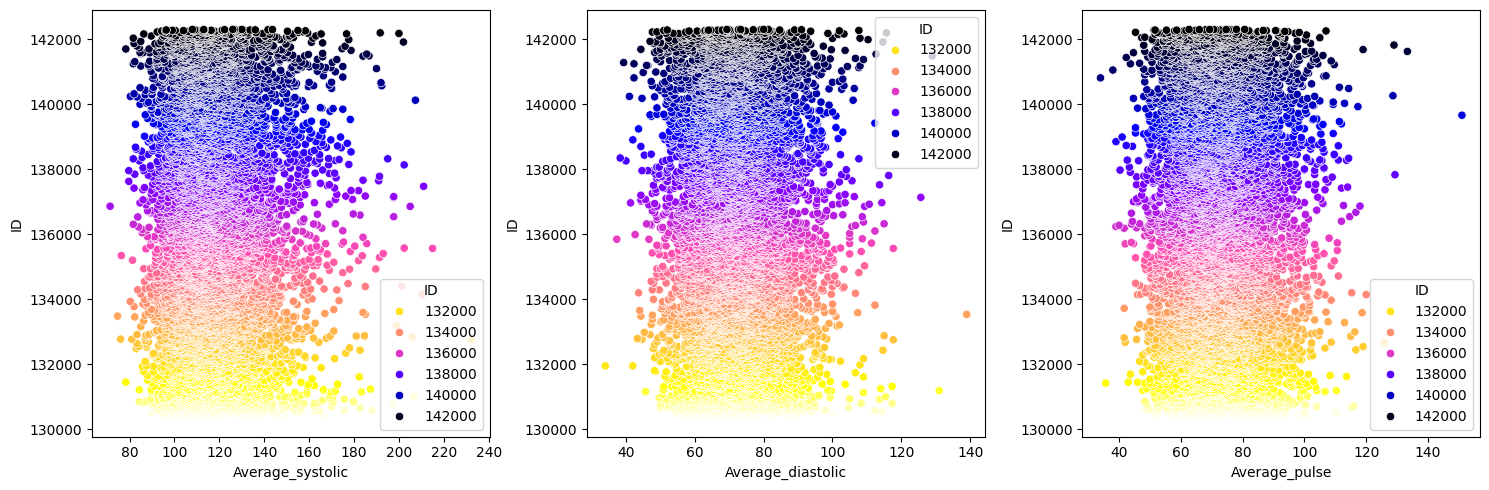

In [30]:
fig, axis = plt.subplots(1, 3, figsize=(15, 5))

palette = sns.color_palette("gnuplot2_r", as_cmap=True)

sns.scatterplot(ax=axis[0], data=blood_pressure_data, x="Average_systolic", y="ID", hue="ID", palette=palette)
sns.scatterplot(ax=axis[1], data=blood_pressure_data, x="Average_diastolic", y="ID", hue="ID", palette=palette)
sns.scatterplot(ax=axis[2], data=blood_pressure_data, x="Average_pulse", y="ID", hue="ID", palette=palette)

plt.tight_layout()

plt.show()

# Summary: This set of scatter plots shows how blood pressure measures (`Average_systolic`, `Average_diastolic`, `Average_pulse`) 
# relate to each `ID`.

# Blood Pressure:
# - Normal: Systolic < 120, Diastolic < 80
# - Elevated: Systolic 120–129, Diastolic < 80
# - Stage 1 High BP: Systolic 130–139, Diastolic 80–89
# - Stage 2 High BP: Systolic 140+, Diastolic 90+
# - Hypertensive Crisis: Systolic > 180, Diastolic > 120 (seek help right away)

# Pulse (Heart Rate):
# - Normal: 60–100 beats per minute (bpm)
# - Low Pulse: Below 60 bpm (could be normal for athletes)
# - High Pulse: Above 100 bpm (could mean stress, fever, or other issues)

# In short:
# - Normal BP: Systolic < 120, Diastolic < 80
# - Normal Pulse: 60–100 bpm

# If either is much higher or lower, it's a good idea to talk to a doctor.

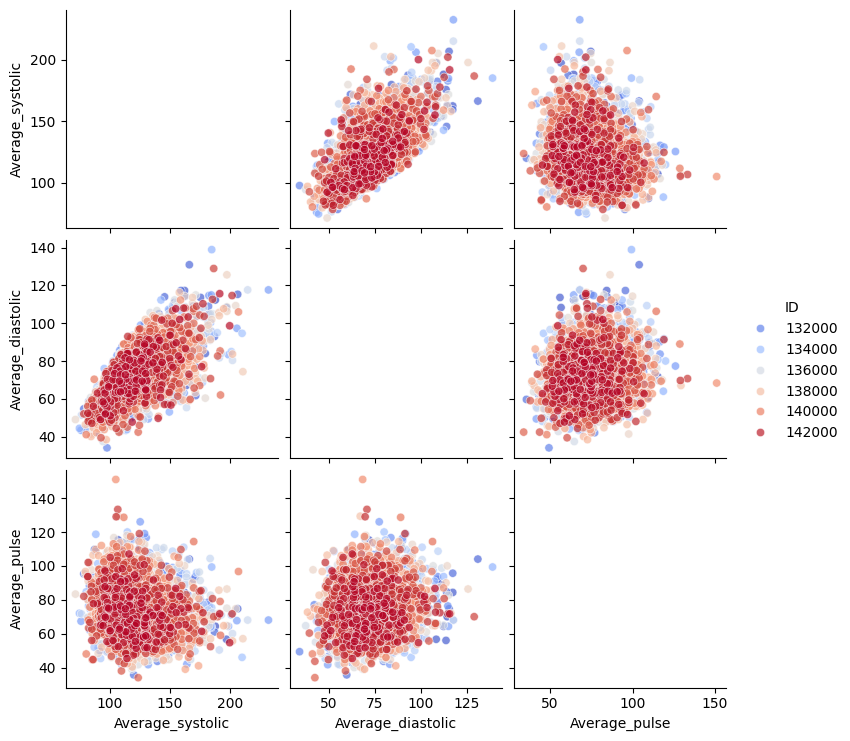

In [31]:
sns.pairplot(blood_pressure_data, vars=["Average_systolic", "Average_diastolic", "Average_pulse"], hue="ID", palette="coolwarm", plot_kws={'alpha':0.7})

plt.show()


In [32]:
#Body Measures (BMX_L)

url_body_mass = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BMX_L.XPT'

response = requests.get(url_body_mass)

if response.status_code == 200:
    with open('BMX_L.XPT', 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [33]:
body_mass_data = pd.read_sas('BMX_L.XPT')

body_mass_data.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,130378.0,1.0,86.9,NaN,NaN,NaN,NaN,NaN,179.5,NaN,...,42.8,NaN,42.0,NaN,35.7,NaN,98.3,NaN,102.9,NaN
1,130379.0,1.0,101.8,NaN,NaN,NaN,NaN,NaN,174.2,NaN,...,38.5,NaN,38.7,NaN,33.7,NaN,114.7,NaN,112.4,NaN
2,130380.0,1.0,69.4,NaN,NaN,NaN,NaN,NaN,152.9,NaN,...,38.5,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN
3,130381.0,1.0,34.3,NaN,NaN,NaN,NaN,NaN,120.1,NaN,...,NaN,NaN,25.4,NaN,23.4,NaN,70.4,NaN,NaN,NaN
4,130382.0,3.0,13.6,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN


In [34]:
body_mass_data = body_mass_data.rename(columns={
    'SEQN': 'ID',
    'BMDSTATS': 'Body Measures Component Status Code',
    'BMXWT': 'Weight (kg)',
    'BMIWT': 'Weight Comment',
    'BMXRECUM': 'Recumbent Length (cm)',
    'BMIRECUM': 'Recumbent Length Comment',
    'BMXHEAD': 'Head Circumference (cm)',
    'BMIHEAD': 'Head Circumference Comment',
    'BMXHT': 'Standing Height (cm)',
    'BMIHT': 'Standing Height Comment',
    'BMXBMI': 'Body Mass Index (kg/m**2)',
    'BMDBMIC': 'BMI Category - Children/Youth',
    'BMXLEG': 'Upper Leg Length (cm)',
    'BMILEG': 'Upper Leg Length Comment',
    'BMXARML': 'Upper Arm Length (cm)',
    'BMIARML': 'Upper Arm Length Comment',
    'BMXARMC': 'Arm Circumference (cm)',
    'BMIARMC': 'Arm Circumference Comment',
    'BMXWAIST': 'Waist Circumference (cm)',
    'BMIWAIST': 'Waist Circumference Comment',
    'BMXHIP': 'Hip Circumference (cm)',
    'BMIHIP': 'Hip Circumference Comment'
})

body_mass_data.head()

,ID,Body Measures Component Status Code,Weight (kg),Weight Comment,Recumbent Length (cm),Recumbent Length Comment,Head Circumference (cm),Head Circumference Comment,Standing Height (cm),Standing Height Comment,...,Upper Leg Length (cm),Upper Leg Length Comment,Upper Arm Length (cm),Upper Arm Length Comment,Arm Circumference (cm),Arm Circumference Comment,Waist Circumference (cm),Waist Circumference Comment,Hip Circumference (cm),Hip Circumference Comment
0,130378.0,1.0,86.9,NaN,NaN,NaN,NaN,NaN,179.5,NaN,...,42.8,NaN,42.0,NaN,35.7,NaN,98.3,NaN,102.9,NaN
1,130379.0,1.0,101.8,NaN,NaN,NaN,NaN,NaN,174.2,NaN,...,38.5,NaN,38.7,NaN,33.7,NaN,114.7,NaN,112.4,NaN
2,130380.0,1.0,69.4,NaN,NaN,NaN,NaN,NaN,152.9,NaN,...,38.5,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN
3,130381.0,1.0,34.3,NaN,NaN,NaN,NaN,NaN,120.1,NaN,...,NaN,NaN,25.4,NaN,23.4,NaN,70.4,NaN,NaN,NaN
4,130382.0,3.0,13.6,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN


In [35]:
body_mass_data.columns

Index(['ID', 'Body Measures Component Status Code', 'Weight (kg)',
       'Weight Comment', 'Recumbent Length (cm)', 'Recumbent Length Comment',
       'Head Circumference (cm)', 'Head Circumference Comment',
       'Standing Height (cm)', 'Standing Height Comment',
       'Body Mass Index (kg/m**2)', 'BMI Category - Children/Youth',
       'Upper Leg Length (cm)', 'Upper Leg Length Comment',
       'Upper Arm Length (cm)', 'Upper Arm Length Comment',
       'Arm Circumference (cm)', 'Arm Circumference Comment',
       'Waist Circumference (cm)', 'Waist Circumference Comment',
       'Hip Circumference (cm)', 'Hip Circumference Comment'],
      dtype='object')

In [36]:
print("\nShape of the dataset:", body_mass_data.shape)


Shape of the dataset: (8860, 22)


In [37]:
# List of columns to drop based on relevance to diabetes prediction
columns_to_drop = [
    'Body Measures Component Status Code', 'Weight Comment', 'Recumbent Length Comment', 
    'Head Circumference Comment', 'Standing Height Comment', 'BMI Category - Children/Youth', 
    'Upper Leg Length Comment', 'Upper Arm Length Comment', 'Arm Circumference Comment', 
    'Waist Circumference Comment', 'Hip Circumference Comment'  # Comment variables
]

# Drop the specified columns from the DataFrame
body_mass_data_cleaned = body_mass_data.drop(columns=columns_to_drop)

# Print the shape of the DataFrame after dropping the columns
print("\033[34mThe shape of the DataFrame after dropping unnecessary columns is:\033[0m", body_mass_data_cleaned.shape)

# Optionally, you can display the first few rows of the cleaned data to verify
print(body_mass_data_cleaned.head())


The shape of the DataFrame after dropping unnecessary columns is: (8860, 11)
         ID  Weight (kg)  Recumbent Length (cm)  Head Circumference (cm)  \
0  130378.0         86.9                    NaN                      NaN   
1  130379.0        101.8                    NaN                      NaN   
2  130380.0         69.4                    NaN                      NaN   
3  130381.0         34.3                    NaN                      NaN   
4  130382.0         13.6                    NaN                      NaN   

   Standing Height (cm)  Body Mass Index (kg/m**2)  Upper Leg Length (cm)  \
0                 179.5                       27.0                   42.8   
1                 174.2                       33.5                   38.5   
2                 152.9                       29.7                   38.5   
3                 120.1                       23.8                    NaN   
4                   NaN                        NaN                    NaN   

   

In [38]:
body_mass_data = body_mass_data_cleaned

In [39]:
# List of columns to check (kept columns after dropping irrelevant ones)
columns_to_check = [
    'Weight (kg)', 'Body Mass Index (kg/m**2)', 'Waist Circumference (cm)', 
    'Hip Circumference (cm)', 'Standing Height (cm)'
]

# Group by 'ID' and apply a check to see if all columns in 'columns_to_check' are non-null
valid_seqn = body_mass_data.groupby('ID')[columns_to_check].apply(lambda x: x.notna().all(axis=1))

# Get only the 'ID' where all columns are complete (i.e., no missing values)
valid_seqn = valid_seqn.groupby('ID').all()

# Filter the dataset to keep only rows with valid 'ID'
valid_seqn = valid_seqn[valid_seqn].index
filtered_data = body_mass_data[body_mass_data['ID'].isin(valid_seqn)]

# Update the DataFrame with the filtered data
body_mass_data = filtered_data

# Print the number of missing values in each column
print("\033[34mThe number of missing values in each column:\033[0m")
print(body_mass_data.isnull().sum())

# Print the shape of the filtered DataFrame
print("\033[34mThe shape of the filtered DataFrame is:\033[0m", body_mass_data.shape)


The number of missing values in each column:
ID                              0
Weight (kg)                     0
Recumbent Length (cm)        6749
Head Circumference (cm)      6749
Standing Height (cm)            0
Body Mass Index (kg/m**2)       0
Upper Leg Length (cm)          50
Upper Arm Length (cm)           8
Arm Circumference (cm)         10
Waist Circumference (cm)        0
Hip Circumference (cm)          0
dtype: int64
The shape of the filtered DataFrame is: (6749, 11)


In [40]:
body_mass_data.shape

(6749, 11)

In [41]:
body_mass_data.head()

,ID,Weight (kg),Recumbent Length (cm),Head Circumference (cm),Standing Height (cm),Body Mass Index (kg/m**2),Upper Leg Length (cm),Upper Arm Length (cm),Arm Circumference (cm),Waist Circumference (cm),Hip Circumference (cm)
0,130378.0,86.9,NaN,NaN,179.5,27.0,42.8,42.0,35.7,98.3,102.9
1,130379.0,101.8,NaN,NaN,174.2,33.5,38.5,38.7,33.7,114.7,112.4
2,130380.0,69.4,NaN,NaN,152.9,29.7,38.5,35.5,36.3,93.5,98.0
5,130386.0,90.6,NaN,NaN,173.3,30.2,42.8,36.2,35.7,106.1,110.6
6,130387.0,103.5,NaN,NaN,155.9,42.6,36.1,37.7,37.4,122.0,148.9


In [42]:
#Liver Ultrasound Transient Elastography (LUX_L)

#url_lux = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/LUX_L.XPT'

#response = requests.get(url_lux)

#if response.status_code == 200:
   
#    with open('LUX_L.XPT', 'wb') as file:
#        file.write(response.content)
#    print('File downloaded successfully! ✅')
#else:
#    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

In [43]:
#liver_ultrasound_transient_elastography_data = pd.read_sas('LUX_L.XPT', format='xport')

#liver_ultrasound_transient_elastography_data.head()

In [44]:
#column_rename_dict = {
#    'SEQN': 'ID',
#    'LUAXSTAT': 'Elastography_exam_status',
#    'LUARXNC': 'Reason_for_partial_exam',
#    'LUARXND': 'Reason_exam_not_done',
#    'LUARXIN': 'Reason_ineligible',
#    'LUAPNME': 'Exam_wand_type',
#    'LUANMVGP': 'Count_complete_measures_from_final_wand',
#    'LUANMTGP': 'Count_measures_attempted_with_final_wand',
#    'LUXSMED': 'Median_stiffness_E_kilopascals_kPa',
#    'LUXSIQR': 'Stiffness_E_interquartile_range_IQRe',
#    'LUXSIQRM': 'Ratio_Stiffness_IQRe_median_E',
#    'LUXCAPM': 'Median_CAP_decibels_per_meter_dB_m',
#    'LUXCPIQR': 'CAP_interquartile_range_IQRc'
#}

#liver_ultrasound_transient_elastography_data = liver_ultrasound_transient_elastography_data.rename(columns=column_rename_dict)

#liver_ultrasound_transient_elastography_data.head()

In [45]:
#print("\nShape of the dataset:", liver_ultrasound_transient_elastography_data.shape)

In [46]:
#liver_ultrasound_transient_elastography_data.nunique()

In [47]:
#liver_ultrasound_transient_elastography_data.isnull().sum()

In [48]:
#liver_ultrasound_transient_elastography_data.duplicated().sum()

In [49]:
#liver_ultrasound_transient_elastography_data.info()

In [50]:
#liver_ultrasound_transient_elastography_data.describe()

In [51]:
#Cholesterol – High-Density Lipoprotein (HDL_L)

url_hdl = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HDL_L.xpt'


response = requests.get(url_hdl)


if response.status_code == 200:
    with open('HDL_L.xpt', 'wb') as file:
        file.write(response.content)  
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [52]:
cholesterol_high_density_lipoprotein_data = pd.read_sas('HDL_L.xpt', format='xport')

cholesterol_high_density_lipoprotein_data.head()

,SEQN,WTPH2YR,LBDHDD,LBDHDDSI
0,130378.0,56042.129410,45.0,1.16
1,130379.0,37435.705647,60.0,1.55
2,130380.0,85328.844519,49.0,1.27
3,130386.0,44526.214135,46.0,1.19
4,130387.0,22746.296353,42.0,1.09


In [53]:
cholesterol_high_density_lipoprotein_data.rename(columns={
    'SEQN': 'ID',
    'WTPH2YR': 'Phlebotomy_2_Year_Weight',
    'LBDHDD': 'Direct_HDL_Cholesterol_mg_dl',
    'LBDHDDSI': 'Direct_HDL_Cholesterol_mmol_L'
}, inplace=True)

cholesterol_high_density_lipoprotein_data.head()

,ID,Phlebotomy_2_Year_Weight,Direct_HDL_Cholesterol_mg_dl,Direct_HDL_Cholesterol_mmol_L
0,130378.0,56042.129410,45.0,1.16
1,130379.0,37435.705647,60.0,1.55
2,130380.0,85328.844519,49.0,1.27
3,130386.0,44526.214135,46.0,1.19
4,130387.0,22746.296353,42.0,1.09


In [54]:
cholesterol_high_density_lipoprotein_data.shape

(8068, 4)

In [55]:
# List of columns to check for missing values in cholesterol data with updated column names
columns_to_check = [
    'Phlebotomy_2_Year_Weight', 
    'Direct_HDL_Cholesterol_mg_dl', 
    'Direct_HDL_Cholesterol_mmol_L'
]

# Group by 'ID' and apply a check to see if all columns in 'columns_to_check' are non-null
valid_ids = cholesterol_high_density_lipoprotein_data.groupby('ID')[columns_to_check].apply(lambda x: x.notna().all(axis=1))

# Get only the 'ID' where all columns are complete (i.e., no missing values)
valid_ids = valid_ids.groupby('ID').all() 

# Filter the dataset to keep only rows with valid 'ID'
valid_ids = valid_ids[valid_ids].index
filtered_data = cholesterol_high_density_lipoprotein_data[cholesterol_high_density_lipoprotein_data['ID'].isin(valid_ids)]

# Update the DataFrame with the filtered data
cholesterol_high_density_lipoprotein_data = filtered_data

# Print the number of missing values in each column
print("\033[34mThe number of missing values in each column:\033[0m")
print(cholesterol_high_density_lipoprotein_data.isnull().sum())

# Print the shape of the filtered DataFrame
print("\033[34mThe shape of the filtered DataFrame is:\033[0m", cholesterol_high_density_lipoprotein_data.shape)


The number of missing values in each column:
ID                               0
Phlebotomy_2_Year_Weight         0
Direct_HDL_Cholesterol_mg_dl     0
Direct_HDL_Cholesterol_mmol_L    0
dtype: int64
The shape of the filtered DataFrame is: (6890, 4)


In [56]:
cholesterol_high_density_lipoprotein_data.shape

(6890, 4)

In [57]:
cholesterol_high_density_lipoprotein_data.duplicated().sum()

np.int64(0)

In [58]:
cholesterol_high_density_lipoprotein_data.isnull().sum()

ID                               0
Phlebotomy_2_Year_Weight         0
Direct_HDL_Cholesterol_mg_dl     0
Direct_HDL_Cholesterol_mmol_L    0
dtype: int64

In [59]:
cholesterol_high_density_lipoprotein_data.nunique()

ID                               6890
Phlebotomy_2_Year_Weight         6730
Direct_HDL_Cholesterol_mg_dl      102
Direct_HDL_Cholesterol_mmol_L     102
dtype: int64

In [60]:
#Cholesterol - Total (TCHOL_L)

url_tchol = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/TCHOL_L.xpt'

response = requests.get(url_tchol)


if response.status_code == 200:
    with open('TCHOL_L.xpt', 'wb') as file:
        file.write(response.content)  
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [61]:
cholesterol_total_data = pd.read_sas('TCHOL_L.xpt', format='xport')

cholesterol_total_data.rename(columns={
    'SEQN': 'ID',
    'WTPF2YR': 'Phlebotomy_2_Year_Weight',
    'LBXTC': 'Total_Cholesterol_mg_dl',
    'LBXTCSI': 'Total_Cholesterol_mmol_L'
}, inplace=True)

cholesterol_total_data.head()

,ID,WTPH2YR,Total_Cholesterol_mg_dl,LBDTCSI
0,130378.0,56042.129410,264.0,6.83
1,130379.0,37435.705647,214.0,5.53
2,130380.0,85328.844519,187.0,4.84
3,130386.0,44526.214135,183.0,4.73
4,130387.0,22746.296353,203.0,5.25


In [62]:
cholesterol_total_data.shape

(8068, 4)

In [63]:
cholesterol_total_data.duplicated().sum()

np.int64(0)

In [64]:
cholesterol_total_data.isnull().sum()

ID                            0
WTPH2YR                       0
Total_Cholesterol_mg_dl    1178
LBDTCSI                    1178
dtype: int64

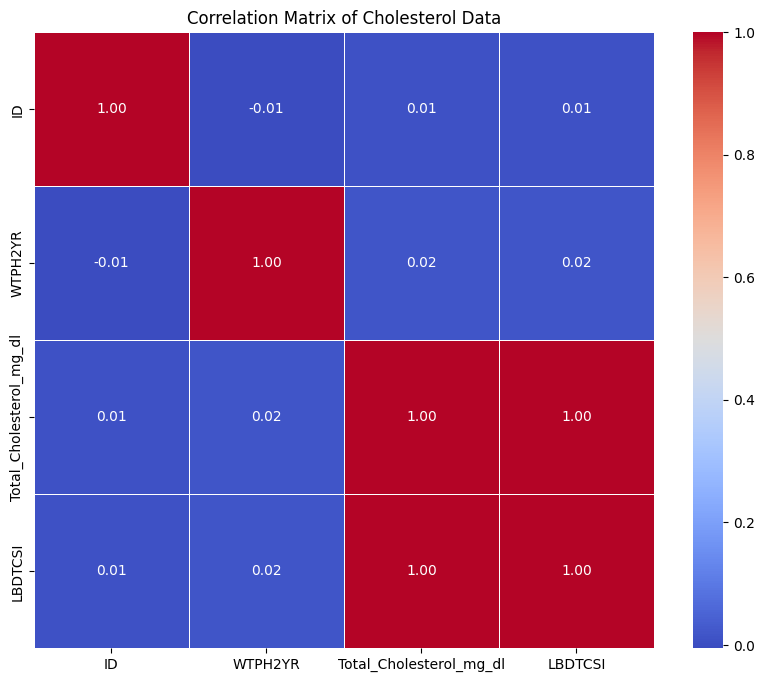

In [65]:
corr_matrix = cholesterol_total_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Cholesterol Data")
plt.show()

In [66]:
# URL for FASTQX_L.xpt file
url_fastqx = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/FASTQX_L.xpt'

# Send GET request to download the file
response = requests.get(url_fastqx)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('FASTQX_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [67]:
# Fasting Questionnaire (FASTQX_L)

fastqx_data = pd.read_sas('FASTQX_L.xpt', format='xport')

fastqx_data.rename(columns={
    'SEQN': 'ID',
    'FASTQX2YR': 'Phlebotomy_2_Year_Weight',
    'LBXGHB': 'Glycated_Hemoglobin_A1C',
    'LBXGHBSI': 'Glycated_Hemoglobin_A1C_mmol_L'
}, inplace=True)

fastqx_data.head()

,ID,PHQ020,PHACOFHR,PHACOFMN,PHQ030,PHAALCHR,PHAALCMN,PHQ040,PHAGUMHR,PHAGUMMN,PHQ050,PHAANTHR,PHAANTMN,PHQ060,PHASUPHR,PHASUPMN,PHAFSTHR,PHAFSTMN,PHDSESNZ
0,130378.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.400000e+01,3.0,5.397605e-79
1,130379.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.000000e+00,45.0,5.397605e-79
2,130380.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.100000e+01,11.0,5.397605e-79
3,130381.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,4.000000e+00,9.0,1.000000e+00
4,130382.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,5.397605e-79,1.0,5.397605e-79


In [68]:
fastqx_data.shape

(8727, 19)

In [69]:
fastqx_data.duplicated().sum()

np.int64(0)

In [70]:
fastqx_data.isnull()

,ID,PHQ020,PHACOFHR,PHACOFMN,PHQ030,PHAALCHR,PHAALCMN,PHQ040,PHAGUMHR,PHAGUMMN,PHQ050,PHAANTHR,PHAANTMN,PHQ060,PHASUPHR,PHASUPMN,PHAFSTHR,PHAFSTMN,PHDSESNZ
0,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False
1,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False
2,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False
3,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False
4,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False
8723,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False
8724,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False
8725,False,False,True,True,False,True,True,False,True,True,False,True,True,False,True,True,False,False,False


In [71]:
# Ferritin (FERTIN_L)
# URL for FERTIN_L.xpt file
url_fertin = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/FERTIN_L.xpt'

# Send GET request to download the file
response = requests.get(url_fertin)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('FERTIN_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [72]:
fertin_data = pd.read_sas('FERTIN_L.xpt', format='xport')

fertin_data.head()

,SEQN,WTPH2YR,LBXFER,LBDFERSI
0,130380.0,8.532884e+04,13.3,13.3
1,130381.0,5.397605e-79,NaN,NaN
2,130382.0,5.963893e+04,24.4,24.4
3,130388.0,3.286429e+04,NaN,NaN
4,130390.0,6.142701e+04,52.1,52.1


In [73]:
fertin_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'FERTIN2YR': 'Phlebotomy_2_Year_Weight',
    'LBXFER': 'Fertility_Status',
    'LBXFERSI': 'Fertility_Status_SI'
}, inplace=True)

# Display the first few rows of the renamed dataframe
fertin_data.head()

,Respondent_Sequence_Number,WTPH2YR,Fertility_Status,LBDFERSI
0,130380.0,8.532884e+04,13.3,13.3
1,130381.0,5.397605e-79,NaN,NaN
2,130382.0,5.963893e+04,24.4,24.4
3,130388.0,3.286429e+04,NaN,NaN
4,130390.0,6.142701e+04,52.1,52.1


In [74]:
fertin_data.shape

(2564, 4)

In [75]:
fertin_data.duplicated().sum()

np.int64(0)

In [76]:
fertin_data.isnull().sum()

Respondent_Sequence_Number      0
WTPH2YR                         0
Fertility_Status              614
LBDFERSI                      614
dtype: int64

In [77]:
fertin_data.var()

Respondent_Sequence_Number    1.191163e+07
WTPH2YR                       1.264348e+09
Fertility_Status              3.838445e+03
LBDFERSI                      3.838445e+03
dtype: float64

In [78]:
fertin_data.corr()

,Respondent_Sequence_Number,WTPH2YR,Fertility_Status,LBDFERSI
Respondent_Sequence_Number,1.000000,-0.002891,-0.033448,-0.033448
WTPH2YR,-0.002891,1.000000,-0.016738,-0.016738
Fertility_Status,-0.033448,-0.016738,1.000000,1.000000
LBDFERSI,-0.033448,-0.016738,1.000000,1.000000


In [79]:
# Glycohemoglobin (GHB_L)

# URL for GHB_L.xpt file
url_ghb = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/GHB_L.xpt'

# Send GET request to download the file
response = requests.get(url_ghb)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('GHB_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

# Load the GHB_L.xpt file

File downloaded successfully! ✅


In [80]:
ghb_data = pd.read_sas('GHB_L.xpt', format='xport')

# Rename the columns (you can customize these names based on the file's column headers)
ghb_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'GHB2YR': 'Phlebotomy_2_Year_Weight',
    'LBXGHB': 'Glycated_Hemoglobin_A1C',
    'LBXGHBSI': 'Glycated_Hemoglobin_A1C_mmol_L'
}, inplace=True)

# Display the first few rows of the renamed dataframe
ghb_data.head()

,Respondent_Sequence_Number,WTPH2YR,LBXGH
0,130378.0,56042.129410,5.6
1,130379.0,37435.705647,5.6
2,130380.0,85328.844519,6.2
3,130386.0,44526.214135,5.1
4,130387.0,22746.296353,5.9


In [81]:
# Insulin (INS_L)

url_ins = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/INS_L.xpt'

# Send GET request to download the file
response = requests.get(url_ins)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('INS_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

# Load the INS_L.xpt file

File downloaded successfully! ✅


In [82]:
insulin_data = pd.read_sas('INS_L.xpt', format='xport')

# Rename the columns (customize the names based on the file headers)
insulin_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'INS2YR': 'Phlebotomy_2_Year_Weight',
    'LBXINS': 'Insulin_Level_uU_ml',
    'LBXINSI': 'Insulin_Level_pmole_L'
}, inplace=True)

# Display the first few rows of the renamed dataframe
insulin_data.head()

,Respondent_Sequence_Number,WTSAF2YR,LBXIN,LBDINSI,LBDINLC
0,130378.0,1.200253e+05,15.53,93.18,5.397605e-79
1,130379.0,5.397605e-79,19.91,119.46,5.397605e-79
2,130380.0,1.450908e+05,16.33,97.98,5.397605e-79
3,130386.0,8.259962e+04,11.38,68.28,5.397605e-79
4,130394.0,1.004203e+05,7.20,43.20,5.397605e-79


In [83]:

# URL for GLU_L.xpt file
url_glu = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/GLU_L.xpt'

# Send GET request to download the file
response = requests.get(url_glu)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('GLU_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [84]:
glucose_data = pd.read_sas('GLU_L.xpt', format='xport')

# Rename the columns (customize the names based on the file headers)
glucose_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'GLU2YR': 'Phlebotomy_2_Year_Weight',
    'LBXGLU': 'Glucose_Level_mg_dl',
    'LBXGLUSI': 'Glucose_Level_mmol_L'
}, inplace=True)

# Display the first few rows of the renamed dataframe
glucose_data.head()

,Respondent_Sequence_Number,WTSAF2YR,Glucose_Level_mg_dl,LBDGLUSI
0,130378.0,1.200253e+05,113.0,6.27
1,130379.0,5.397605e-79,99.0,5.50
2,130380.0,1.450908e+05,156.0,8.66
3,130386.0,8.259962e+04,100.0,5.55
4,130394.0,1.004203e+05,88.0,4.88


In [85]:
# High-Sensitivity C-Reactive Protein (HSCRP_L)

url_hscrp = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HSCRP_L.xpt'

# Send GET request to download the file
response = requests.get(url_hscrp)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('HSCRP_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [86]:
hscrp_data = pd.read_sas('HSCRP_L.xpt', format='xport')

hscrp_data.head()

,SEQN,WTPH2YR,LBXHSCRP,LBDHRPLC
0,130378.0,5.604213e+04,1.78,5.397605e-79
1,130379.0,3.743571e+04,2.03,5.397605e-79
2,130380.0,8.532884e+04,5.62,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN


In [87]:
hscrp_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'WTPH2YR': 'Phlebotomy_2_Year_Weight',
    'LBXHSCRP': 'HS_C_Reactive_Protein_mg_L',
    'LBDHRPLC': 'HS_C_Reactive_Protein_Comment_Code'
}, inplace=True)

hscrp_data.head()

,Respondent_Sequence_Number,Phlebotomy_2_Year_Weight,HS_C_Reactive_Protein_mg_L,HS_C_Reactive_Protein_Comment_Code
0,130378.0,5.604213e+04,1.78,5.397605e-79
1,130379.0,3.743571e+04,2.03,5.397605e-79
2,130380.0,8.532884e+04,5.62,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN


In [88]:

url_vid = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/VID_L.xpt'

# Send GET request to download the file
response = requests.get(url_vid)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('VID_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [89]:
# Load the VID_L.xpt file
vid_data = pd.read_sas('VID_L.xpt', format='xport')

# Rename the columns
vid_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'WTPH2YR': 'Phlebotomy_2_Year_Weight',
    'LBXVIDMS': '25OHD2_25OHD3_nmol_L',
    'LBDVIDLC': '25OHD2_25OHD3_Comment_Code',
    'LBXVD2MS': '25OHD2_nmol_L',
    'LBDVD2LC': '25OHD2_Comment_Code',
    'LBXVD3MS': '25OHD3_nmol_L',
    'LBDVD3LC': '25OHD3_Comment_Code',
    'LBXVE3MS': 'epi_25OHD3_nmol_L',
    'LBDVE3LC': 'epi_25OHD3_Comment_Code'
}, inplace=True)

# Display the first few rows of the renamed dataframe
vid_data.head()


,Respondent_Sequence_Number,Phlebotomy_2_Year_Weight,25OHD2_25OHD3_nmol_L,25OHD2_25OHD3_Comment_Code,25OHD2_nmol_L,25OHD2_Comment_Code,25OHD3_nmol_L,25OHD3_Comment_Code,epi_25OHD3_nmol_L,epi_25OHD3_Comment_Code
0,130378.0,5.604213e+04,58.9,5.397605e-79,1.57,1.0,57.3,5.397605e-79,2.47,5.397605e-79
1,130379.0,3.743571e+04,60.5,5.397605e-79,1.57,1.0,58.9,5.397605e-79,3.40,5.397605e-79
2,130380.0,8.532884e+04,39.4,5.397605e-79,1.57,1.0,37.8,5.397605e-79,1.52,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
import requests
import pandas as pd

# URL for PBCD_L.xpt file
url_pbcd = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PBCD_L.xpt'

# Send GET request to download the file
response = requests.get(url_pbcd)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('PBCD_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')



#


File downloaded successfully! ✅


In [91]:


# Load the PBCD_L.xpt file
pbcd_data = pd.read_sas('PBCD_L.xpt', format='xport')

pbcd_data.head()




,SEQN,WTPH2YR,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC
0,130378.0,5.604213e+04,2.810,0.136,5.397605e-79,0.117,1.041,5.397605e-79,1.01,5.04,5.397605e-79,189.2,2.40,5.397605e-79,10.94,199.13,5.397605e-79
1,130379.0,3.743571e+04,2.040,0.099,5.397605e-79,0.313,2.785,5.397605e-79,9.64,48.10,5.397605e-79,192.3,2.44,5.397605e-79,7.74,140.88,5.397605e-79
2,130380.0,8.532884e+04,0.399,0.019,5.397605e-79,0.270,2.402,5.397605e-79,0.55,2.74,5.397605e-79,160.5,2.04,5.397605e-79,11.93,217.15,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,0.619,0.030,5.397605e-79,0.136,1.210,5.397605e-79,0.12,0.60,1.000000e+00,151.9,1.93,5.397605e-79,15.49,281.95,5.397605e-79


In [92]:
pbcd_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'WTPH2YR': 'Phlebotomy_2_Year_Weight',
    'LBXBPB': 'Blood_Lead_ug_dL',
    'LBDBPBSI': 'Blood_Lead_umol_L',
    'LBDBPBLC': 'Blood_Lead_Comment_Code',
    'LBXBCD': 'Blood_Cadmium_ug_L',
    'LBDBCDSI': 'Blood_Cadmium_nmol_L',
    'LBDBCDLC': 'Blood_Cadmium_Comment_Code',
    'LBXTHG': 'Blood_Mercury_Total_ug_L',
    'LBDTHGSI': 'Blood_Mercury_Total_nmol_L',
    'LBDTHGLC': 'Blood_Mercury_Total_Comment_Code',
    'LBXBSE': 'Blood_Selenium_ug_L',
    'LBDBSESI': 'Blood_Selenium_umol_L',
    'LBDBSELC': 'Blood_Selenium_Comment_Code',
    'LBXBMN': 'Blood_Manganese_ug_L',
    'LBDBMNSI': 'Blood_Manganese_nmol_L',
    'LBDBMNLC': 'Blood_Manganese_Comment_Code'
}, inplace=True)

# Display the first few rows of the renamed dataframe
pbcd_data.head()

,Respondent_Sequence_Number,Phlebotomy_2_Year_Weight,Blood_Lead_ug_dL,Blood_Lead_umol_L,Blood_Lead_Comment_Code,Blood_Cadmium_ug_L,Blood_Cadmium_nmol_L,Blood_Cadmium_Comment_Code,Blood_Mercury_Total_ug_L,Blood_Mercury_Total_nmol_L,Blood_Mercury_Total_Comment_Code,Blood_Selenium_ug_L,Blood_Selenium_umol_L,Blood_Selenium_Comment_Code,Blood_Manganese_ug_L,Blood_Manganese_nmol_L,Blood_Manganese_Comment_Code
0,130378.0,5.604213e+04,2.810,0.136,5.397605e-79,0.117,1.041,5.397605e-79,1.01,5.04,5.397605e-79,189.2,2.40,5.397605e-79,10.94,199.13,5.397605e-79
1,130379.0,3.743571e+04,2.040,0.099,5.397605e-79,0.313,2.785,5.397605e-79,9.64,48.10,5.397605e-79,192.3,2.44,5.397605e-79,7.74,140.88,5.397605e-79
2,130380.0,8.532884e+04,0.399,0.019,5.397605e-79,0.270,2.402,5.397605e-79,0.55,2.74,5.397605e-79,160.5,2.04,5.397605e-79,11.93,217.15,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,0.619,0.030,5.397605e-79,0.136,1.210,5.397605e-79,0.12,0.60,1.000000e+00,151.9,1.93,5.397605e-79,15.49,281.95,5.397605e-79


In [93]:
import requests
import pandas as pd

# URL for IHGEM_L.xpt file
url_ihgem = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/IHGEM_L.xpt'

# Send GET request to download the file
response = requests.get(url_ihgem)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('IHGEM_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

# Load the IHGEM_L.xpt file
ihgem_data = pd.read_sas('IHGEM_L.xpt', format='xport')

# Rename the columns
ihgem_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'WTPH2YR': 'Phlebotomy_2_Year_Weight',
    'LBXIHG': 'Mercury_Inorganic_ug_L',
    'LBDIHGSI': 'Mercury_Inorganic_nmol_L',
    'LBDIHGLC': 'Mercury_Inorganic_Comment_Code',
    'LBXBGE': 'Mercury_Ethyl_ug_L',
    'LBDBGESI': 'Mercury_Ethyl_nmol_L',
    'LBDBGELC': 'Mercury_Ethyl_Comment_Code',
    'LBXBGM': 'Mercury_Methyl_ug_L',
    'LBDBGMSI': 'Mercury_Methyl_nmol_L',
    'LBDBGMLC': 'Mercury_Methyl_Comment_Code'
}, inplace=True)

# Display the first few rows of the renamed dataframe
ihgem_data.head()


File downloaded successfully! ✅


,Respondent_Sequence_Number,Phlebotomy_2_Year_Weight,Mercury_Inorganic_ug_L,Mercury_Inorganic_nmol_L,Mercury_Inorganic_Comment_Code,Mercury_Ethyl_ug_L,Mercury_Ethyl_nmol_L,Mercury_Ethyl_Comment_Code,Mercury_Methyl_ug_L,Mercury_Methyl_nmol_L,Mercury_Methyl_Comment_Code
0,130378.0,5.604213e+04,0.15,0.75,1.000000e+00,0.05,0.25,1.0,0.77,3.84,5.397605e-79
1,130379.0,3.743571e+04,0.42,2.10,5.397605e-79,0.05,0.25,1.0,8.45,42.17,5.397605e-79
2,130380.0,8.532884e+04,0.15,0.75,1.000000e+00,0.05,0.25,1.0,0.54,2.69,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:

# URL for IHGEM_L.xpt file
url_ihgem = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/IHGEM_L.xpt'

# Send GET request to download the file
response = requests.get(url_ihgem)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('IHGEM_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [95]:
# Load the IHGEM_L.xpt file
ihgem_data = pd.read_sas('IHGEM_L.xpt', format='xport')

# Rename the columns
ihgem_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'WTPH2YR': 'Phlebotomy_2_Year_Weight',
    'LBXIHG': 'Mercury_Inorganic_ug_L',
    'LBDIHGSI': 'Mercury_Inorganic_nmol_L',
    'LBDIHGLC': 'Mercury_Inorganic_Comment_Code',
    'LBXBGE': 'Mercury_Ethyl_ug_L',
    'LBDBGESI': 'Mercury_Ethyl_nmol_L',
    'LBDBGELC': 'Mercury_Ethyl_Comment_Code',
    'LBXBGM': 'Mercury_Methyl_ug_L',
    'LBDBGMSI': 'Mercury_Methyl_nmol_L',
    'LBDBGMLC': 'Mercury_Methyl_Comment_Code'
}, inplace=True)

# Display the first few rows of the renamed dataframe
ihgem_data.head()


,Respondent_Sequence_Number,Phlebotomy_2_Year_Weight,Mercury_Inorganic_ug_L,Mercury_Inorganic_nmol_L,Mercury_Inorganic_Comment_Code,Mercury_Ethyl_ug_L,Mercury_Ethyl_nmol_L,Mercury_Ethyl_Comment_Code,Mercury_Methyl_ug_L,Mercury_Methyl_nmol_L,Mercury_Methyl_Comment_Code
0,130378.0,5.604213e+04,0.15,0.75,1.000000e+00,0.05,0.25,1.0,0.77,3.84,5.397605e-79
1,130379.0,3.743571e+04,0.42,2.10,5.397605e-79,0.05,0.25,1.0,8.45,42.17,5.397605e-79
2,130380.0,8.532884e+04,0.15,0.75,1.000000e+00,0.05,0.25,1.0,0.54,2.69,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
import requests
import pandas as pd

# URL for ALQ_L.xpt file
url_alq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/ALQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_alq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('ALQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')




File downloaded successfully! ✅


In [97]:
# Load the ALQ_L.xpt file
alq_data = pd.read_sas('ALQ_L.xpt', format='xport')

# Rename the columns
alq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'ALQ111': 'Ever_Had_A_Drink_Of_Alcohol',
    'ALQ121': 'Past_12_Mos_How_Often_Drink_Alcohol_Beverage',
    'ALQ130': 'Avg_Alcoholic_Drinks_Per_Day_Past_12_Mos',
    'ALQ142': 'Number_Of_Days_Have_4_5_Drinks_Past_12_Mos',
    'ALQ270': 'Number_Of_Times_4_5_Drinks_In_2hrs_Past_12_Mos',
    'ALQ280': 'Number_Of_Times_8_Alcoholic_Drinks_In_1_Day_Past_12_Mos',
    'ALQ151': 'Ever_Have_4_5_Or_More_Drinks_Every_Day',
    'ALQ170': 'Number_Of_Times_4_5_Drinks_On_Occasion_Past_Month'
}, inplace=True)

# Display the first few rows of the renamed dataframe
alq_data.head()


,Respondent_Sequence_Number,Ever_Had_A_Drink_Of_Alcohol,Past_12_Mos_How_Often_Drink_Alcohol_Beverage,Avg_Alcoholic_Drinks_Per_Day_Past_12_Mos,Number_Of_Days_Have_4_5_Drinks_Past_12_Mos,Number_Of_Times_4_5_Drinks_In_2hrs_Past_12_Mos,Number_Of_Times_8_Alcoholic_Drinks_In_1_Day_Past_12_Mos,Ever_Have_4_5_Or_More_Drinks_Every_Day,Number_Of_Times_4_5_Drinks_On_Occasion_Past_Month
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,1.0,2.000000e+00,3.0,5.397605e-79,NaN,NaN,2.0,NaN
2,130380.0,1.0,1.000000e+01,1.0,5.397605e-79,NaN,NaN,2.0,NaN
3,130386.0,1.0,4.000000e+00,2.0,1.000000e+01,5.397605e-79,10.0,2.0,5.397605e-79
4,130387.0,1.0,5.397605e-79,NaN,NaN,NaN,NaN,2.0,NaN


In [98]:
#Blood Pressure & Cholesterol (BPQ_L)

# URL for BPQ_L.xpt file
url_bpq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/BPQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_bpq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('BPQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [99]:
bpq_data = pd.read_sas('BPQ_L.xpt', format='xport')

# Rename the columns
bpq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'BPQ020': 'Ever_Told_Had_High_Blood_Pressure',
    'BPQ030': 'Told_Had_High_Blood_Pressure_2_Times',
    'BPQ150': 'Taking_High_Blood_Pressure_Medication',
    'BPQ080': 'Doctor_Told_High_Cholesterol_Level',
    'BPQ101D': 'Taking_Meds_To_Lower_Blood_Cholesterol'
}, inplace=True)

# Display the first few rows of the renamed dataframe
bpq_data.head()

,Respondent_Sequence_Number,Ever_Told_Had_High_Blood_Pressure,Told_Had_High_Blood_Pressure_2_Times,Taking_High_Blood_Pressure_Medication,Doctor_Told_High_Cholesterol_Level,Taking_Meds_To_Lower_Blood_Cholesterol
0,130378.0,1.0,1.0,1.0,2.0,2.0
1,130379.0,1.0,1.0,1.0,2.0,2.0
2,130380.0,2.0,NaN,NaN,1.0,1.0
3,130384.0,2.0,NaN,NaN,2.0,2.0
4,130385.0,2.0,NaN,NaN,2.0,2.0


In [100]:
#Diabetes (DIQ_L)

# URL for DIQ_L.xpt file
url_diq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DIQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_diq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('DIQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [101]:
diq_data = pd.read_sas('DIQ_L.xpt', format='xport')

# Rename the columns
diq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'DIQ010': 'Doctor_Told_Had_Diabetes',
    'DID040': 'Age_When_First_Told_Had_Diabetes',
    'DIQ159': 'Check_Item_1',
    'DIQ160': 'Ever_Told_Had_Prediabetes',
    'DIQ180': 'Had_Blood_Test_Past_3_Years',
    'DIQ050': 'Taking_Insulin_Now',
    'DID060': 'How_Long_Taking_Insulin',
    'DIQ060U': 'Unit_Of_Measure_For_Insulin_Taking',
    'DIQ065': 'Check_Item_2',
    'DIQ070': 'Take_Diabetic_Pills_To_Lower_Blood_Sugar'
}, inplace=True)

# Display the first few rows of the renamed dataframe
diq_data.head()

,Respondent_Sequence_Number,Doctor_Told_Had_Diabetes,Age_When_First_Told_Had_Diabetes,Ever_Told_Had_Prediabetes,Had_Blood_Test_Past_3_Years,Taking_Insulin_Now,How_Long_Taking_Insulin,Unit_Of_Measure_For_Insulin_Taking,Take_Diabetic_Pills_To_Lower_Blood_Sugar
0,130378.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN
1,130379.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN
2,130380.0,1.0,35.0,NaN,NaN,2.0,NaN,NaN,1.0
3,130381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Diet Behavior & Nutrition (DBQ_L)

# URL for DBQ_L.xpt file
url_dbq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DBQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_dbq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('DBQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [103]:
# Load the DBQ_L.xpt file
dbq_data = pd.read_sas('DBQ_L.xpt', format='xport')

# Rename the columns
dbq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'DBQ010': 'Ever_Breastfed_Or_Fed_Breastmilk',
    'DBD030': 'Age_Stopped_Breastfeeding_Days',
    'DBD041': 'Age_First_Fed_Formula_Days',
    'DBD050': 'Age_Stopped_Receiving_Formula_Days',
    'DBD055': 'Age_Started_Other_Food_Beverage',
    'DBD061': 'Age_First_Fed_Milk_Days',
    'DBQ073A': 'Type_Of_Milk_First_Fed_Whole_Milk',
    'DBQ073B': 'Type_Of_Milk_First_Fed_2_Percent_Milk',
    'DBQ073C': 'Type_Of_Milk_First_Fed_1_Percent_Milk',
    'DBQ073D': 'Type_Of_Milk_First_Fed_Fat_Free_Milk',
    'DBQ073E': 'Type_Of_Milk_First_Fed_Soy_Milk',
    'DBQ073U': 'Type_Of_Milk_First_Fed_Other',
    'DBD265A': 'Check_Item_1',
    'DBQ301': 'Community_Government_Meals_Delivered',
    'DBQ330': 'Eat_Meals_At_Community_Senior_Center',
    'DBD355': 'Check_Item_2',
    'DBQ360': 'Attend_Kindergarten_Thru_High_School',
    'DBQ370': 'School_Serves_School_Lunches',
    'DBD381': 'Number_Of_Times_Per_Week_Get_School_Lunch',
    'DBQ390': 'School_Lunch_Free_Reduced_Full_Price',
    'DBQ400': 'School_Serves_Complete_Breakfast_Each_Day',
    'DBD411': 'Number_Of_Times_Per_Week_Get_School_Breakfast',
    'DBQ421': 'School_Breakfast_Free_Reduced_Full_Price',
    'DBQ422': 'Check_Item_3',
    'DBQ424': 'Summer_Program_Meal_Free_Reduced_Price',
    'DBD710': 'Check_Item_4',
    'DBQ930': 'Main_Meal_Planner_Preparer',
    'DBQ935': 'Shared_Meal_Planning_Preparing_Duty',
    'DBQ940': 'Main_Food_Shopper',
    'DBQ945': 'Shared_Food_Shopping_Duty'
}, inplace=True)

# Display the first few rows of the renamed dataframe
dbq_data.head()


,Respondent_Sequence_Number,Ever_Breastfed_Or_Fed_Breastmilk,Age_Stopped_Breastfeeding_Days,Age_First_Fed_Formula_Days,Age_Stopped_Receiving_Formula_Days,Age_Started_Other_Food_Beverage,Age_First_Fed_Milk_Days,Type_Of_Milk_First_Fed_Whole_Milk,Type_Of_Milk_First_Fed_2_Percent_Milk,Type_Of_Milk_First_Fed_1_Percent_Milk,...,Number_Of_Times_Per_Week_Get_School_Lunch,School_Lunch_Free_Reduced_Full_Price,School_Serves_Complete_Breakfast_Each_Day,Number_Of_Times_Per_Week_Get_School_Breakfast,School_Breakfast_Free_Reduced_Full_Price,Summer_Program_Meal_Free_Reduced_Price,Main_Meal_Planner_Preparer,Shared_Meal_Planning_Preparing_Duty,Main_Food_Shopper,Shared_Food_Shopping_Duty
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0
1,130379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0
2,130380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0
3,130381.0,1.0,273.0,273.0,456.0,212.0,395.0,10.0,NaN,NaN,...,3.0,1.0,1.0,5.397605e-79,NaN,1.0,NaN,NaN,NaN,NaN
4,130382.0,1.0,91.0,91.0,365.0,365.0,425.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#Current Health Status (HSQ_L)

# URL for HSQ_L.xpt file
url_hsq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/HSQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_hsq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('HSQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

#

File downloaded successfully! ✅


In [105]:

hsq_data = pd.read_sas('HSQ_L.xpt', format='xport')

# Rename the columns
hsq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'HSQ590': 'Blood_Ever_Tested_For_HIV_Virus'
}, inplace=True)

# Display the first few rows of the renamed dataframe
hsq_data.head()


,Respondent_Sequence_Number,Blood_Ever_Tested_For_HIV_Virus
0,130378.0,NaN
1,130379.0,1.0
2,130380.0,1.0
3,130386.0,1.0
4,130387.0,2.0


In [106]:
# Medical Conditions (MCQ_L)

url_mcq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/MCQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_mcq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('MCQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')



File downloaded successfully! ✅


In [107]:

# Load the MCQ_L.xpt file
mcq_data = pd.read_sas('MCQ_L.xpt', format='xport')

# Rename the columns
mcq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'MCQ010': 'Ever_Been_Told_Have_Asthma',
    'MCQ035': 'Still_Have_Asthma',
    'MCQ040': 'Had_Asthma_Attack_In_Past_Year',
    'MCQ050': 'Emergency_Care_Visit_For_Asthma_Past_Year',
    'AGQ030': 'Episode_Of_Hay_Fever_Past_Year',
    'MCQ053': 'Taking_Treatment_For_Anemia_Past_3_Mos',
    'MCQ145': 'Check_Item_1',
    'MCQ149': 'Menstrual_Periods_Started_Yet',
    'MCQ157': 'Check_Item_2',
    'MCQ160a': 'Doctor_Ever_Said_Had_Arthritis',
    'MCQ195': 'Which_Type_Of_Arthritis_Was_It',
    'MCQ160b': 'Ever_Told_Had_Congestive_Heart_Failure',
    'MCQ160c': 'Ever_Told_Had_Coronary_Heart_Disease',
    'MCQ160d': 'Ever_Told_Had_Angina_Angina_Pectoris',
    'MCQ160e': 'Ever_Told_Had_Heart_Attack',
    'MCQ160f': 'Ever_Told_Had_A_Stroke',
    'MCQ160m': 'Ever_Told_Had_Thyroid_Problem',
    'MCQ170m': 'Do_You_Still_Have_Thyroid_Problem',
    'MCQ160p': 'Ever_Told_Had_COPD_Emphysema_ChB',
    'MCQ160l': 'Ever_Told_Had_Any_Liver_Condition',
    'MCQ170l': 'Do_You_Still_Have_A_Liver_Condition',
    'MCQ500': 'Ever_Told_Had_Any_Liver_Condition_2',
    'MCQ510a': 'Liver_Condition_Fatty_Liver',
    'MCQ510b': 'Liver_Condition_Liver_Fibrosis',
    'MCQ510c': 'Liver_Condition_Liver_Cirrhosis',
    'MCQ510d': 'Liver_Condition_Viral_Hepatitis',
    'MCQ510e': 'Liver_Condition_Autoimmune_Hepatitis',
    'MCQ510f': 'Liver_Condition_Other_Liver_Disease',
    'MCQ515': 'Check_Item_3',
    'MCQ550': 'Has_Doctor_Ever_Said_Had_Gallstones',
    'MCQ560': 'Ever_Had_Gallbladder_Surgery',
    'MCQ220': 'Ever_Told_Had_Cancer_Or_Malignancy',
    'MCQ230a': '1st_Cancer_Type',
    'MCQ230b': '2nd_Cancer_Type',
    'MCQ230c': '3rd_Cancer_Type',
    'MCQ230d': 'More_Than_3_Kinds_Of_Cancer',
    'OSQ230': 'Any_Metal_Objects_Inside_Your_Body'
}, inplace=True)

# Display the first few rows of the renamed dataframe
mcq_data.head()


,Respondent_Sequence_Number,Ever_Been_Told_Have_Asthma,Still_Have_Asthma,Had_Asthma_Attack_In_Past_Year,Emergency_Care_Visit_For_Asthma_Past_Year,Episode_Of_Hay_Fever_Past_Year,Taking_Treatment_For_Anemia_Past_3_Mos,Menstrual_Periods_Started_Yet,MCQ160A,Which_Type_Of_Arthritis_Was_It,...,MCQ510E,MCQ510F,Has_Doctor_Ever_Said_Had_Gallstones,Ever_Had_Gallbladder_Surgery,Ever_Told_Had_Cancer_Or_Malignancy,MCQ230A,MCQ230B,MCQ230C,MCQ230D,Any_Metal_Objects_Inside_Your_Body
0,130378.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,1.0,2.0,...,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0
1,130379.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,...,NaN,NaN,2.0,2.0,1.0,30.0,NaN,NaN,NaN,1.0
2,130380.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,...,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1.0
3,130381.0,2.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130382.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
# Physical Activity (PAQ_L)

# URL for PAQ_L.xpt file
url_paq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/PAQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_paq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('PAQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')



File downloaded successfully! ✅


In [109]:


# Load the PAQ_L.xpt file
paq_data = pd.read_sas('PAQ_L.xpt', format='xport')

# Rename the columns
paq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'PAD790Q': 'Frequency_Of_Moderate_LTPA',
    'PAD790U': 'Moderate_LTPA_Unit',
    'PAD800': 'Minutes_Moderate_LTPA',
    'PAD810Q': 'Frequency_Of_Vigorous_LTPA',
    'PAD810U': 'Vigorous_LTPA_Unit',
    'PAD820': 'Minutes_Vigorous_LTPA',
    'PAD680': 'Minutes_Sedentary_Activity'
}, inplace=True)

# Display the first few rows of the renamed dataframe
paq_data.head()


,Respondent_Sequence_Number,Frequency_Of_Moderate_LTPA,Moderate_LTPA_Unit,Minutes_Moderate_LTPA,Frequency_Of_Vigorous_LTPA,Vigorous_LTPA_Unit,Minutes_Vigorous_LTPA,Minutes_Sedentary_Activity
0,130378.0,3.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,360.0
1,130379.0,4.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,480.0
2,130380.0,1.000000e+00,b'W',20.0,5.397605e-79,b'',NaN,240.0
3,130384.0,5.397605e-79,b'',NaN,5.397605e-79,b'',NaN,60.0
4,130385.0,1.000000e+00,b'D',90.0,1.000000e+00,b'W',60.0,180.0


In [110]:
# Data File: SMQ_L.xpt

# URL for SMQ_L.xpt file
url_smq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/SMQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_smq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('SMQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [111]:
# Load the SMQ_L.xpt file
smq_data = pd.read_sas('SMQ_L.xpt', format='xport')

# Rename the columns
smq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'SMQ020': 'Smoked_At_Least_100_Cigarettes_In_Life',
    'SMQ040': 'Do_You_Now_Smoke_Cigarettes',
    'SMD641': 'Days_Smoked_Cigs_In_Past_30_Days',
    'SMD650': 'Avg_Cigarettes_Per_Day_In_Past_30_Days',
    'SMD100MN': 'Cigarette_Menthol_Indicator',
    'SMQ621': 'Cigarettes_Smoked_In_Entire_Life',
    'SMD630': 'Age_First_Smoked_Whole_Cigarette',
    'SMAQUEX2': 'Questionnaire_Mode_Flag'
}, inplace=True)

# Display the first few rows of the renamed dataframe
smq_data.head()


,Respondent_Sequence_Number,Smoked_At_Least_100_Cigarettes_In_Life,Do_You_Now_Smoke_Cigarettes,Days_Smoked_Cigs_In_Past_30_Days,Avg_Cigarettes_Per_Day_In_Past_30_Days,Cigarette_Menthol_Indicator,Cigarettes_Smoked_In_Entire_Life,Age_First_Smoked_Whole_Cigarette,Questionnaire_Mode_Flag
0,130378.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
1,130379.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2,130380.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [112]:
# Sleep Disorders (SLQ_L)

# URL for SLQ_L.xpt file
url_slq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/SLQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_slq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('SLQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [113]:
# Load the SLQ_L.xpt file
slq_data = pd.read_sas('SLQ_L.xpt', format='xport')

# Rename the columns
slq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'SLQ300': 'Usual_Sleep_Time_On_Weekdays_Or_Workdays',
    'SLQ310': 'Usual_Wake_Time_On_Weekdays_Or_Workdays',
    'SLD012': 'Sleep_Hours_Weekdays_Or_Workdays',
    'SLQ320': 'Usual_Sleep_Time_On_Weekends',
    'SLQ330': 'Usual_Wake_Time_On_Weekends',
    'SLD013': 'Sleep_Hours_Weekends'
}, inplace=True)

# Display the first few rows of the renamed dataframe
slq_data.head()


,Respondent_Sequence_Number,Usual_Sleep_Time_On_Weekdays_Or_Workdays,Usual_Wake_Time_On_Weekdays_Or_Workdays,Sleep_Hours_Weekdays_Or_Workdays,Usual_Sleep_Time_On_Weekends,Usual_Wake_Time_On_Weekends,Sleep_Hours_Weekends
0,130378.0,b'21:30',b'07:00',9.5,b'00:00',b'09:00',9.0
1,130379.0,b'21:00',b'06:00',9.0,b'21:00',b'06:00',9.0
2,130380.0,b'00:00',b'08:00',8.0,b'00:00',b'09:00',9.0
3,130384.0,b'21:30',b'05:00',7.5,b'23:00',b'07:00',8.0
4,130385.0,b'22:05',b'06:15',8.0,b'22:05',b'06:15',8.0


In [114]:
# Data File: WHQ_L.xpt
# URL for WHQ_L.xpt file
url_whq = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/WHQ_L.xpt'

# Send GET request to download the file
response = requests.get(url_whq)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('WHQ_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [115]:
# Load the WHQ_L.xpt file
whq_data = pd.read_sas('WHQ_L.xpt', format='xport')

# Rename the columns
whq_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'WHD010': 'Current_Self_Reported_Height_Inches',
    'WHD020': 'Current_Self_Reported_Weight_Pounds',
    'WHD050': 'Self_Reported_Weight_1_Year_Ago_Pounds',
    'WHQ070': 'Tried_To_Lose_Weight_In_Past_Year'
}, inplace=True)

# Display the first few rows of the renamed dataframe
whq_data.head()


,Respondent_Sequence_Number,Current_Self_Reported_Height_Inches,Current_Self_Reported_Weight_Pounds,Self_Reported_Weight_1_Year_Ago_Pounds,Tried_To_Lose_Weight_In_Past_Year
0,130378.0,71.0,190.0,200.0,1.0
1,130379.0,70.0,220.0,220.0,2.0
2,130380.0,60.0,150.0,165.0,1.0
3,130384.0,68.0,204.0,212.0,1.0
4,130385.0,70.0,240.0,240.0,2.0


In [116]:
# Dietary Interview - Individual Foods, First Day (DR1IFF_L)

# URL for DR1IFF_L.xpt file
url_dr1iff = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DR1IFF_L.xpt'

# Send GET request to download the file
response = requests.get(url_dr1iff)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('DR1IFF_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [117]:
dr1iff_data = pd.read_sas('DR1IFF_L.xpt', format='xport')

# Rename the columns
dr1iff_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'WTDRD1': 'Dietary_Day_One_Sample_Weight',
    'WTDR2D': 'Dietary_Two_Day_Sample_Weight',
    'DR1ILINE': 'Food_Individual_Component_Number',
    'DR1DRSTZ': 'Dietary_Recall_Status',
    'DR1EXMER': 'Interviewer_ID_Code',
    'DRABF': 'Breast_Fed_Infant',
    'DRDINT': 'Number_Of_Days_Of_Intake',
    'DR1DBIH': 'Days_Between_Intake_And_HH_Interview',
    'DR1DAY': 'Intake_Day_Of_The_Week',
    'DR1LANG': 'Language_Respondent_Used_Mostly',
    'DR1CCMNM': 'Combination_Food_Number',
    'DR1CCMTX': 'Combination_Food_Type',
    'DR1_020': 'Time_Of_Eating_Occasion',
    'DR1_030Z': 'Name_Of_Eating_Occasion',
    'DR1FS': 'Source_Of_Food',
    'DR1_040Z': 'Ate_Meal_At_Home',
    'DR1IFDCD': 'USDA_Food_Code',
    'DR1IGRMS': 'Grams',
    'DR1IKCAL': 'Energy_kcal',
    'DR1IPROT': 'Protein_gm',
    'DR1ICARB': 'Carbohydrate_gm',
    'DR1ISUGR': 'Total_Sugars_gm',
    'DR1IFIBE': 'Dietary_Fiber_gm',
    'DR1ITFAT': 'Total_Fat_gm',
    'DR1ISFAT': 'Total_Saturated_Fatty_Acids_gm',
    'DR1IMFAT': 'Total_Monounsaturated_Fatty_Acids_gm',
    'DR1IPFAT': 'Total_Polyunsaturated_Fatty_Acids_gm',
    'DR1ICHOL': 'Cholesterol_mg',
    'DR1IATOC': 'Vitamin_E_As_Alpha_Tocopherol_mg',
    'DR1IATOA': 'Added_Alpha_Tocopherol_Vitamin_E_mg',
    'DR1IRET': 'Retinol_mc',
    'DR1IVARA': 'Vitamin_A_RAE_mc',
    'DR1IACAR': 'Alpha_Carotene_mc',
    'DR1IBCAR': 'Beta_Carotene_mc',
    'DR1ICRYP': 'Beta_Cryptoxanthin_mc',
    'DR1ILYCO': 'Lycopene_mc',
    'DR1ILZ': 'Lutein_+_Zeaxanthin_mc',
    'DR1IVB1': 'Thiamin_Vitamin_B1_mg',
    'DR1IVB2': 'Riboflavin_Vitamin_B2_mg',
    'DR1INIAC': 'Niacin_mg',
    'DR1IVB6': 'Vitamin_B6_mg',
    'DR1IFOLA': 'Total_Folate_mc',
    'DR1IFA': 'Folic_Acid_mc',
    'DR1IFF': 'Food_Folate_mc',
    'DR1IFDFE': 'Folate_DFE_mc',
    'DR1ICHL': 'Total_Choline_mg',
    'DR1IVB12': 'Vitamin_B12_mc',
    'DR1IB12A': 'Added_Vitamin_B12_mc',
    'DR1IVC': 'Vitamin_C_mg',
    'DR1IVD': 'Vitamin_D_D2_+_D3_mc',
    'DR1IVK': 'Vitamin_K_mc',
    'DR1ICALC': 'Calcium_mg',
    'DR1IPHOS': 'Phosphorus_mg',
    'DR1IMAGN': 'Magnesium_mg',
    'DR1IIRON': 'Iron_mg',
    'DR1IZINC': 'Zinc_mg',
    'DR1ICOPP': 'Copper_mg',
    'DR1ISODI': 'Sodium_mg',
    'DR1IPOTA': 'Potassium_mg',
    'DR1ISELE': 'Selenium_mc',
    'DR1ICAFF': 'Caffeine_mg',
    'DR1ITHEO': 'Theobromine_mg',
    'DR1IALCO': 'Alcohol_gm',
    'DR1IMOIS': 'Moisture_gm',
    'DR1IS040': 'SFA_4_0_Butanoic_gm',
    'DR1IS060': 'SFA_6_0_Hexanoic_gm',
    'DR1IS080': 'SFA_8_0_Octanoic_gm',
    'DR1IS100': 'SFA_10_0_Decanoic_gm',
    'DR1IS120': 'SFA_12_0_Dodecanoic_gm',
    'DR1IS140': 'SFA_14_0_Tetradecanoic_gm',
    'DR1IS160': 'SFA_16_0_Hexadecanoic_gm',
    'DR1IS180': 'SFA_18_0_Octadecanoic_gm',
    'DR1IM161': 'MFA_16_1_Hexadecenoic_gm',
    'DR1IM181': 'MFA_18_1_Octadecenoic_gm',
    'DR1IM201': 'MFA_20_1_Eicosenoic_gm',
    'DR1IM221': 'MFA_22_1_Docosenoic_gm',
    'DR1IP182': 'PFA_18_2_Octadecadienoic_gm',
    'DR1IP183': 'PFA_18_3_Octadecatrienoic_gm',
    'DR1IP184': 'PFA_18_4_Octadecatetraenoic_gm',
    'DR1IP204': 'PFA_20_4_Eicosatetraenoic_gm',
    'DR1IP205': 'PFA_20_5_Eicosapentaenoic_gm',
    'DR1IP225': 'PFA_22_5_Docosapentaenoic_gm',
    'DR1IP226': 'PFA_22_6_Docosahexaenoic_gm'
}, inplace=True)

# Display the first few rows of the renamed dataframe
dr1iff_data.head()

,Respondent_Sequence_Number,Dietary_Day_One_Sample_Weight,Dietary_Two_Day_Sample_Weight,Food_Individual_Component_Number,Dietary_Recall_Status,Interviewer_ID_Code,Breast_Fed_Infant,Number_Of_Days_Of_Intake,Days_Between_Intake_And_HH_Interview,Intake_Day_Of_The_Week,...,MFA_18_1_Octadecenoic_gm,MFA_20_1_Eicosenoic_gm,MFA_22_1_Docosenoic_gm,PFA_18_2_Octadecadienoic_gm,PFA_18_3_Octadecatrienoic_gm,PFA_18_4_Octadecatetraenoic_gm,PFA_20_4_Eicosatetraenoic_gm,PFA_20_5_Eicosapentaenoic_gm,PFA_22_5_Docosapentaenoic_gm,PFA_22_6_Docosahexaenoic_gm
0,130378.0,61366.555827,70554.222162,1.0,1.0,73.0,2.0,2.0,40.0,4.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
1,130378.0,61366.555827,70554.222162,2.0,1.0,73.0,2.0,2.0,40.0,4.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,130378.0,61366.555827,70554.222162,3.0,1.0,73.0,2.0,2.0,40.0,4.0,...,5.397605e-79,5.397605e-79,5.397605e-79,3.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
3,130378.0,61366.555827,70554.222162,4.0,1.0,73.0,2.0,2.0,40.0,4.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,130378.0,61366.555827,70554.222162,5.0,1.0,73.0,2.0,2.0,40.0,4.0,...,6.530000e-01,7.000000e-03,5.397605e-79,1.418000e+00,1.890000e-01,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e-03


In [118]:
# Dietary Interview - Individual Foods, Second Day (DR2IFF_L)

# URL for DR2IFF_L.xpt file
url_dr2iff = 'https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DR2IFF_L.xpt'

# Send GET request to download the file
response = requests.get(url_dr2iff)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    with open('DR2IFF_L.xpt', 'wb') as file:
        file.write(response.content)  # Save the content to the file
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')


File downloaded successfully! ✅


In [119]:
# Load the DR2IFF_L.xpt file
dr2iff_data = pd.read_sas('DR2IFF_L.xpt', format='xport')

# Rename the columns
dr2iff_data.rename(columns={
    'SEQN': 'Respondent_Sequence_Number',
    'WTDRD1': 'Dietary_Day_One_Sample_Weight',
    'WTDR2D': 'Dietary_Two_Day_Sample_Weight',
    'DR2ILINE': 'Food_Individual_Component_Number',
    'DR2DRSTZ': 'Dietary_Recall_Status',
    'DR2EXMER': 'Interviewer_ID_Code',
    'DRABF': 'Breast_Fed_Infant',
    'DRDINT': 'Number_Of_Days_Of_Intake',
    'DR2DBIH': 'Days_Between_Intake_And_HH_Interview',
    'DR2DAY': 'Intake_Day_Of_The_Week',
    'DR2LANG': 'Language_Respondent_Used_Mostly',
    'DR2CCMNM': 'Combination_Food_Number',
    'DR2CCMTX': 'Combination_Food_Type',
    'DR2_020': 'Time_Of_Eating_Occasion',
    'DR2_030Z': 'Name_Of_Eating_Occasion',
    'DR2FS': 'Source_Of_Food',
    'DR2_040Z': 'Ate_Meal_At_Home',
    'DR2IFDCD': 'USDA_Food_Code',
    'DR2IGRMS': 'Grams',
    'DR2IKCAL': 'Energy_kcal',
    'DR2IPROT': 'Protein_gm',
    'DR2ICARB': 'Carbohydrate_gm',
    'DR2ISUGR': 'Total_Sugars_gm',
    'DR2IFIBE': 'Dietary_Fiber_gm',
    'DR2ITFAT': 'Total_Fat_gm',
    'DR2ISFAT': 'Total_Saturated_Fatty_Acids_gm',
    'DR2IMFAT': 'Total_Monounsaturated_Fatty_Acids_gm',
    'DR2IPFAT': 'Total_Polyunsaturated_Fatty_Acids_gm',
    'DR2ICHOL': 'Cholesterol_mg',
    'DR2IATOC': 'Vitamin_E_As_Alpha_Tocopherol_mg',
    'DR2IATOA': 'Added_Alpha_Tocopherol_Vitamin_E_mg',
    'DR2IRET': 'Retinol_mc',
    'DR2IVARA': 'Vitamin_A_RAE_mc',
    'DR2IACAR': 'Alpha_Carotene_mc',
    'DR2IBCAR': 'Beta_Carotene_mc',
    'DR2ICRYP': 'Beta_Cryptoxanthin_mc',
    'DR2ILYCO': 'Lycopene_mc',
    'DR2ILZ': 'Lutein_+_Zeaxanthin_mc',
    'DR2IVB1': 'Thiamin_Vitamin_B1_mg',
    'DR2IVB2': 'Riboflavin_Vitamin_B2_mg',
    'DR2INIAC': 'Niacin_mg',
    'DR2IVB6': 'Vitamin_B6_mg',
    'DR2IFOLA': 'Total_Folate_mc',
    'DR2IFA': 'Folic_Acid_mc',
    'DR2IFF': 'Food_Folate_mc',
    'DR2IFDFE': 'Folate_DFE_mc',
    'DR2ICHL': 'Total_Choline_mg',
    'DR2IVB12': 'Vitamin_B12_mc',
    'DR2IB12A': 'Added_Vitamin_B12_mc',
    'DR2IVC': 'Vitamin_C_mg',
    'DR2IVD': 'Vitamin_D_D2_+_D3_mc',
    'DR2IVK': 'Vitamin_K_mc',
    'DR2ICALC': 'Calcium_mg',
    'DR2IPHOS': 'Phosphorus_mg',
    'DR2IMAGN': 'Magnesium_mg',
    'DR2IIRON': 'Iron_mg',
    'DR2IZINC': 'Zinc_mg',
    'DR2ICOPP': 'Copper_mg',
    'DR2ISODI': 'Sodium_mg',
    'DR2IPOTA': 'Potassium_mg',
    'DR2ISELE': 'Selenium_mc',
    'DR2ICAFF': 'Caffeine_mg',
    'DR2ITHEO': 'Theobromine_mg',
    'DR2IALCO': 'Alcohol_gm',
    'DR2IMOIS': 'Moisture_gm',
    'DR2IS040': 'SFA_4_0_Butanoic_gm',
    'DR2IS060': 'SFA_6_0_Hexanoic_gm',
    'DR2IS080': 'SFA_8_0_Octanoic_gm',
    'DR2IS100': 'SFA_10_0_Decanoic_gm',
    'DR2IS120': 'SFA_12_0_Dodecanoic_gm',
    'DR2IS140': 'SFA_14_0_Tetradecanoic_gm',
    'DR2IS160': 'SFA_16_0_Hexadecanoic_gm',
    'DR2IS180': 'SFA_18_0_Octadecanoic_gm',
    'DR2IM161': 'MFA_16_1_Hexadecenoic_gm',
    'DR2IM181': 'MFA_18_1_Octadecenoic_gm',
    'DR2IM201': 'MFA_20_1_Eicosenoic_gm',
    'DR2IM221': 'MFA_22_1_Docosenoic_gm',
    'DR2IP182': 'PFA_18_2_Octadecadienoic_gm',
    'DR2IP183': 'PFA_18_3_Octadecatrienoic_gm',
    'DR2IP184': 'PFA_18_4_Octadecatetraenoic_gm',
    'DR2IP204': 'PFA_20_4_Eicosatetraenoic_gm',
    'DR2IP205': 'PFA_20_5_Eicosapentaenoic_gm',
    'DR2IP225': 'PFA_22_5_Docosapentaenoic_gm',
    'DR2IP226': 'PFA_22_6_Docosahexaenoic_gm'
}, inplace=True)

# Display the first few rows of the renamed dataframe
dr2iff_data.head()


,Respondent_Sequence_Number,Dietary_Day_One_Sample_Weight,Dietary_Two_Day_Sample_Weight,Food_Individual_Component_Number,Dietary_Recall_Status,Interviewer_ID_Code,Breast_Fed_Infant,Number_Of_Days_Of_Intake,Days_Between_Intake_And_HH_Interview,Intake_Day_Of_The_Week,...,MFA_18_1_Octadecenoic_gm,MFA_20_1_Eicosenoic_gm,MFA_22_1_Docosenoic_gm,PFA_18_2_Octadecadienoic_gm,PFA_18_3_Octadecatrienoic_gm,PFA_18_4_Octadecatetraenoic_gm,PFA_20_4_Eicosatetraenoic_gm,PFA_20_5_Eicosapentaenoic_gm,PFA_22_5_Docosapentaenoic_gm,PFA_22_6_Docosahexaenoic_gm
0,130378.0,61366.555827,70554.222162,1.0,1.0,49.0,2.0,2.0,45.0,2.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
1,130378.0,61366.555827,70554.222162,2.0,1.0,49.0,2.0,2.0,45.0,2.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,130378.0,61366.555827,70554.222162,3.0,1.0,49.0,2.0,2.0,45.0,2.0,...,5.397605e-79,5.397605e-79,5.397605e-79,6.000000e-03,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
3,130378.0,61366.555827,70554.222162,4.0,1.0,49.0,2.0,2.0,45.0,2.0,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,130378.0,61366.555827,70554.222162,5.0,1.0,49.0,2.0,2.0,45.0,2.0,...,1.360000e-01,5.397605e-79,5.397605e-79,9.800000e-02,2.100000e-02,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [120]:
# Dietary Interview - Total Nutrient Intakes, First Day (DR1TOT_L)
url = 'https://wwwn.cdc.gov/nchs/data/nhanes/public/2021/datafiles/dr1tot_l.xpt'

# Send a request to fetch the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the file to local disk
    with open('dr1tot_l.xpt', 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')

File downloaded successfully! ✅


In [121]:
# Read the .xpt file into a pandas DataFrame
dr1tot_data = pd.read_sas('dr1tot_l.xpt')

# Column renaming dictionary
column_rename_dict = {
    'SEQN': 'Respondent sequence number',
    'WTDRD1': 'Dietary day one sample weight',
    'WTDR2D': 'Dietary two-day sample weight',
    'DR1DRSTZ': 'Dietary recall status',
    'DR1EXMER': 'Interviewer ID code',
    'DRABF': 'Breast-fed infant (either day)',
    'DRDINT': 'Number of days of intake',
    'DR1DBIH': '# of days b/w intake and HH interview',
    'DR1DAY': 'Intake day of the week',
    'DR1LANG': 'Language respondent used mostly',
    'DR1MRESP': 'Main respondent for this interview',
    'DR1HELP': 'Helped in responding for this interview',
    'DBQ095Z': 'Type of table salt used',
    'DBD100': 'How often add salt to food at table',
    'DRQSPREP': 'Salt used in preparation?',
    'DR1STY': 'Salt used at table yesterday?',
    'DR1SKY': 'Type of salt used yesterday',
    'DRQSDIET': 'On special diet?',
    'DRQSDT1': 'Weight loss/Low calorie diet',
    'DRQSDT2': 'Low fat/Low cholesterol diet',
    'DRQSDT3': 'Low salt/Low sodium diet',
    'DRQSDT4': 'Sugar free/Low sugar diet',
    'DRQSDT5': 'Low fiber diet',
    'DRQSDT6': 'High fiber diet',
    'DRQSDT7': 'Diabetic diet',
    'DRQSDT8': 'Weight gain/Muscle building diet',
    'DRQSDT9': 'Low carbohydrate diet',
    'DRQSDT10': 'High protein diet',
    'DRQSDT11': 'Gluten-free/Celiac diet',
    'DRQSDT12': 'Renal/Kidney diet',
    'DRQSDT91': 'Other special diet',
    'DR1TNUMF': 'Number of foods/beverages reported',
    'DR1TKCAL': 'Energy (kcal)',
    'DR1TPROT': 'Protein (gm)',
    'DR1TCARB': 'Carbohydrate (gm)',
    'DR1TSUGR': 'Total sugars (gm)',
    'DR1TFIBE': 'Dietary fiber (gm)',
    'DR1TTFAT': 'Total fat (gm)',
    'DR1TSFAT': 'Total saturated fatty acids (gm)',
    'DR1TMFAT': 'Total monounsaturated fatty acids (gm)',
    'DR1TPFAT': 'Total polyunsaturated fatty acids (gm)',
    'DR1TCHOL': 'Cholesterol (mg)',
    'DR1TATOC': 'Vitamin E as alpha-tocopherol (mg)',
    'DR1TATOA': 'Added alpha-tocopherol (Vitamin E) (mg)',
    'DR1TRET': 'Retinol (mcg)',
    'DR1TVARA': 'Vitamin A, RAE (mcg)',
    'DR1TACAR': 'Alpha-carotene (mcg)',
    'DR1TBCAR': 'Beta-carotene (mcg)',
    'DR1TCRYP': 'Beta-cryptoxanthin (mcg)',
    'DR1TLYCO': 'Lycopene (mcg)',
    'DR1TLZ': 'Lutein + zeaxanthin (mcg)',
    'DR1TVB1': 'Thiamin (Vitamin B1) (mg)',
    'DR1TVB2': 'Riboflavin (Vitamin B2) (mg)',
    'DR1TNIAC': 'Niacin (mg)',
    'DR1TVB6': 'Vitamin B6 (mg)',
    'DR1TFOLA': 'Total folate (mcg)',
    'DR1TFA': 'Folic acid (mcg)',
    'DR1TFF': 'Food folate (mcg)',
    'DR1TFDFE': 'Folate, DFE (mcg)',
    'DR1TCHL': 'Total choline (mg)',
    'DR1TVB12': 'Vitamin B12 (mcg)',
    'DR1TB12A': 'Added vitamin B12 (mcg)',
    'DR1TVC': 'Vitamin C (mg)',
    'DR1TVD': 'Vitamin D (D2 + D3) (mcg)',
    'DR1TVK': 'Vitamin K (mcg)',
    'DR1TCALC': 'Calcium (mg)',
    'DR1TPHOS': 'Phosphorus (mg)',
    'DR1TMAGN': 'Magnesium (mg)',
    'DR1TIRON': 'Iron (mg)',
    'DR1TZINC': 'Zinc (mg)',
    'DR1TCOPP': 'Copper (mg)',
    'DR1TSODI': 'Sodium (mg)',
    'DR1TPOTA': 'Potassium (mg)',
    'DR1TSELE': 'Selenium (mcg)',
    'DR1TCAFF': 'Caffeine (mg)',
    'DR1TTHEO': 'Theobromine (mg)',
    'DR1TALCO': 'Alcohol (gm)',
    'DR1TMOIS': 'Moisture (gm)',
    'DR1TS040': 'SFA 4:0 (Butanoic) (gm)',
    'DR1TS060': 'SFA 6:0 (Hexanoic) (gm)',
    'DR1TS080': 'SFA 8:0 (Octanoic) (gm)',
    'DR1TS100': 'SFA 10:0 (Decanoic) (gm)',
    'DR1TS120': 'SFA 12:0 (Dodecanoic) (gm)',
    'DR1TS140': 'SFA 14:0 (Tetradecanoic) (gm)',
    'DR1TS160': 'SFA 16:0 (Hexadecanoic) (gm)',
    'DR1TS180': 'SFA 18:0 (Octadecanoic) (gm)',
    'DR1TM161': 'MFA 16:1 (Hexadecenoic) (gm)',
    'DR1TM181': 'MFA 18:1 (Octadecenoic) (gm)',
    'DR1TM201': 'MFA 20:1 (Eicosenoic) (gm)',
    'DR1TM221': 'MFA 22:1 (Docosenoic) (gm)',
    'DR1TP182': 'PFA 18:2 (Octadecadienoic) (gm)',
    'DR1TP183': 'PFA 18:3 (Octadecatrienoic) (gm)',
    'DR1TP184': 'PFA 18:4 (Octadecatetraenoic) (gm)',
    'DR1TP204': 'PFA 20:4 (Eicosatetraenoic) (gm)',
    'DR1TP205': 'PFA 20:5 (Eicosapentaenoic) (gm)',
    'DR1TP225': 'PFA 22:5 (Docosapentaenoic) (gm)',
    'DR1TP226': 'PFA 22:6 (Docosahexaenoic) (gm)',
    'DR1_300': 'Compare food consumed yesterday to usual',
    'DR1_320Z': 'Total plain water drank yesterday (gm)',
    'DR1_330Z': 'Total tap water drank yesterday (gm)',
    'DR1BWATZ': 'Total bottled water drank yesterday (gm)',
    'DR1TWSZ': 'Tap water source',
    'DRD340': 'Shellfish eaten during past 30 days',
    'DRD350A': 'Clams eaten during past 30 days',
    'DRD350AQ': '# of times clams eaten in past 30 days',
    'DRD350B': 'Crabs eaten during past 30 days',
    'DRD350BQ': '# of times crabs eaten in past 30 days',
    'DRD350C': 'Crayfish eaten during past 30 days',
    'DRD350CQ': '# of times crayfish eaten past 30 days',
    'DRD350D': 'Lobsters eaten during past 30 days'
}

# Rename columns based on the dictionary
dr1tot_data = dr1tot_data.rename(columns=column_rename_dict)

# Show the first few rows of the DataFrame
dr1tot_data.head()


,Respondent sequence number,Dietary day one sample weight,Dietary two-day sample weight,Dietary recall status,Interviewer ID code,Breast-fed infant (either day),Number of days of intake,# of days b/w intake and HH interview,Intake day of the week,Language respondent used mostly,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,130378.0,61366.555827,70554.222162,1.0,73.0,2.0,2.0,40.0,4.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,130379.0,34638.056480,36505.468348,1.0,73.0,2.0,2.0,19.0,4.0,1.0,...,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,130380.0,84728.261560,103979.190677,1.0,73.0,2.0,2.0,16.0,4.0,1.0,...,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
3,130381.0,61737.133446,75009.220819,1.0,91.0,2.0,2.0,23.0,5.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,130382.0,75846.746917,172361.851828,1.0,73.0,2.0,2.0,27.0,6.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [122]:
# Dietary Interview - Total Nutrient Intakes, Second Day (DR2TOT_L
url_dr2tot = 'https://wwwn.cdc.gov/nchs/data/nhanes/public/2021/datafiles/dr2tot_l.xpt'

# Send a request to fetch the data
response = requests.get(url_dr2tot)

# Check if the request was successful
if response.status_code == 200:
    # Save the file to local disk
    with open('dr2tot_l.xpt', 'wb') as file:
        file.write(response.content)
    print('File downloaded successfully! ✅')
else:
    print(f'Oops! Something went wrong. Status code: {response.status_code}. Looks like the file is playing hard to get.')




File downloaded successfully! ✅


In [123]:
# Read the .xpt file into a pandas DataFrame
dr2tot_data = pd.read_sas('dr2tot_l.xpt')

# Column renaming dictionary for DR2TOT_L
column_rename_dict = {
    'SEQN': 'Respondent sequence number',
    'WTDRD1': 'Dietary day one sample weight',
    'WTDR2D': 'Dietary two-day sample weight',
    'DR2DRSTZ': 'Dietary recall status',
    'DR2EXMER': 'Interviewer ID code',
    'DRABF': 'Breast-fed infant (either day)',
    'DRDINT': 'Number of days of intake',
    'DR2DBIH': '# of days b/w intake and HH interview',
    'DR2DAY': 'Intake day of the week',
    'DR2LANG': 'Language respondent used mostly',
    'DR2MRESP': 'Main respondent for this interview',
    'DR2HELP': 'Helped in responding for this interview',
    'DR2TNUMF': 'Number of foods/beverages reported',
    'DR2STY': 'Salt used at table yesterday?',
    'DR2SKY': 'Type of salt used yesterday',
    'DR2TKCAL': 'Energy (kcal)',
    'DR2TPROT': 'Protein (gm)',
    'DR2TCARB': 'Carbohydrate (gm)',
    'DR2TSUGR': 'Total sugars (gm)',
    'DR2TFIBE': 'Dietary fiber (gm)',
    'DR2TTFAT': 'Total fat (gm)',
    'DR2TSFAT': 'Total saturated fatty acids (gm)',
    'DR2TMFAT': 'Total monounsaturated fatty acids (gm)',
    'DR2TPFAT': 'Total polyunsaturated fatty acids (gm)',
    'DR2TCHOL': 'Cholesterol (mg)',
    'DR2TATOC': 'Vitamin E as alpha-tocopherol (mg)',
    'DR2TATOA': 'Added alpha-tocopherol (Vitamin E) (mg)',
    'DR2TRET': 'Retinol (mcg)',
    'DR2TVARA': 'Vitamin A, RAE (mcg)',
    'DR2TACAR': 'Alpha-carotene (mcg)',
    'DR2TBCAR': 'Beta-carotene (mcg)',
    'DR2TCRYP': 'Beta-cryptoxanthin (mcg)',
    'DR2TLYCO': 'Lycopene (mcg)',
    'DR2TLZ': 'Lutein + zeaxanthin (mcg)',
    'DR2TVB1': 'Thiamin (Vitamin B1) (mg)',
    'DR2TVB2': 'Riboflavin (Vitamin B2) (mg)',
    'DR2TNIAC': 'Niacin (mg)',
    'DR2TVB6': 'Vitamin B6 (mg)',
    'DR2TFOLA': 'Total folate (mcg)',
    'DR2TFA': 'Folic acid (mcg)',
    'DR2TFF': 'Food folate (mcg)',
    'DR2TFDFE': 'Folate, DFE (mcg)',
    'DR2TCHL': 'Total choline (mg)',
    'DR2TVB12': 'Vitamin B12 (mcg)',
    'DR2TB12A': 'Added vitamin B12 (mcg)',
    'DR2TVC': 'Vitamin C (mg)',
    'DR2TVD': 'Vitamin D (D2 + D3) (mcg)',
    'DR2TVK': 'Vitamin K (mcg)',
    'DR2TCALC': 'Calcium (mg)',
    'DR2TPHOS': 'Phosphorus (mg)',
    'DR2TMAGN': 'Magnesium (mg)',
    'DR2TIRON': 'Iron (mg)',
    'DR2TZINC': 'Zinc (mg)',
    'DR2TCOPP': 'Copper (mg)',
    'DR2TSODI': 'Sodium (mg)',
    'DR2TPOTA': 'Potassium (mg)',
    'DR2TSELE': 'Selenium (mcg)',
    'DR2TCAFF': 'Caffeine (mg)',
    'DR2TTHEO': 'Theobromine (mg)',
    'DR2TALCO': 'Alcohol (gm)',
    'DR2TMOIS': 'Moisture (gm)',
    'DR2TS040': 'SFA 4:0 (Butanoic) (gm)',
    'DR2TS060': 'SFA 6:0 (Hexanoic) (gm)',
    'DR2TS080': 'SFA 8:0 (Octanoic) (gm)',
    'DR2TS100': 'SFA 10:0 (Decanoic) (gm)',
    'DR2TS120': 'SFA 12:0 (Dodecanoic) (gm)',
    'DR2TS140': 'SFA 14:0 (Tetradecanoic) (gm)',
    'DR2TS160': 'SFA 16:0 (Hexadecanoic) (gm)',
    'DR2TS180': 'SFA 18:0 (Octadecanoic) (gm)',
    'DR2TM161': 'MFA 16:1 (Hexadecenoic) (gm)',
    'DR2TM181': 'MFA 18:1 (Octadecenoic) (gm)',
    'DR2TM201': 'MFA 20:1 (Eicosenoic) (gm)',
    'DR2TM221': 'MFA 22:1 (Docosenoic) (gm)',
    'DR2TP182': 'PFA 18:2 (Octadecadienoic) (gm)',
    'DR2TP183': 'PFA 18:3 (Octadecatrienoic) (gm)',
    'DR2TP184': 'PFA 18:4 (Octadecatetraenoic) (gm)',
    'DR2TP204': 'PFA 20:4 (Eicosatetraenoic) (gm)',
    'DR2TP205': 'PFA 20:5 (Eicosapentaenoic) (gm)',
    'DR2TP225': 'PFA 22:5 (Docosapentaenoic) (gm)',
    'DR2TP226': 'PFA 22:6 (Docosahexaenoic) (gm)',
    'DR2_300': 'Compare food consumed yesterday to usual',
    'DR2_320Z': 'Total plain water drank yesterday (gm)',
    'DR2_330Z': 'Total tap water drank yesterday (gm)',
    'DR2BWATZ': 'Total bottled water drank yesterday (gm)',
    'DR2TWSZ': 'Tap water source'
}

# Rename columns based on the dictionary
dr2tot_data = dr2tot_data.rename(columns=column_rename_dict)

# Show the first few rows of the DataFrame
dr2tot_data.head()


,Respondent sequence number,Dietary day one sample weight,Dietary two-day sample weight,Dietary recall status,Interviewer ID code,Breast-fed infant (either day),Number of days of intake,# of days b/w intake and HH interview,Intake day of the week,Language respondent used mostly,...,PFA 18:4 (Octadecatetraenoic) (gm),PFA 20:4 (Eicosatetraenoic) (gm),PFA 20:5 (Eicosapentaenoic) (gm),PFA 22:5 (Docosapentaenoic) (gm),PFA 22:6 (Docosahexaenoic) (gm),Compare food consumed yesterday to usual,Total plain water drank yesterday (gm),Total tap water drank yesterday (gm),Total bottled water drank yesterday (gm),Tap water source
0,130378.0,61366.555827,70554.222162,1.0,49.0,2.0,2.0,45.0,2.0,1.0,...,2.350000e-01,0.194,1.500000e+00,0.665,1.973000e+00,2.0,960.0,9.600000e+02,5.397605e-79,1.0
1,130379.0,34638.056480,36505.468348,1.0,7.0,2.0,2.0,27.0,5.0,1.0,...,5.397605e-79,0.114,3.000000e-03,0.007,4.000000e-03,2.0,240.0,2.400000e+02,5.397605e-79,1.0
2,130380.0,84728.261560,103979.190677,1.0,65.0,2.0,2.0,20.0,1.0,1.0,...,5.397605e-79,0.092,5.397605e-79,0.010,9.000000e-03,2.0,960.0,9.600000e+02,5.397605e-79,1.0
3,130381.0,61737.133446,75009.220819,1.0,91.0,2.0,2.0,40.0,1.0,1.0,...,5.397605e-79,0.015,3.000000e-03,0.001,5.397605e-79,2.0,300.0,5.397605e-79,3.000000e+02,4.0
4,130382.0,75846.746917,172361.851828,1.0,90.0,2.0,2.0,35.0,7.0,1.0,...,5.000000e-03,0.065,1.000000e-02,0.017,3.000000e-03,2.0,1110.0,1.110000e+03,5.397605e-79,1.0
